In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [2]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

#plt.style.use('plot_style.txt')
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [3]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

In [4]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'paper_results_gaussian_AAE/version1'
best_model_folder = '79df1_00001' #version1
#best_model_folder = '79df1_00024'
#best_model_folder = '733b8_00013' #version4
pred_datafile = directory1 +'/model/pred.hdf5'

In [5]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [6]:

best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [7]:
best_model_hist.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

In [8]:
color = [cmap(0.8), cmap(0.2)]
color = ['tab:blue', 'tab:red']
#scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
                'markersize': 4, 'alpha': 1}
val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
               'markersize': 3, 'alpha': 1}

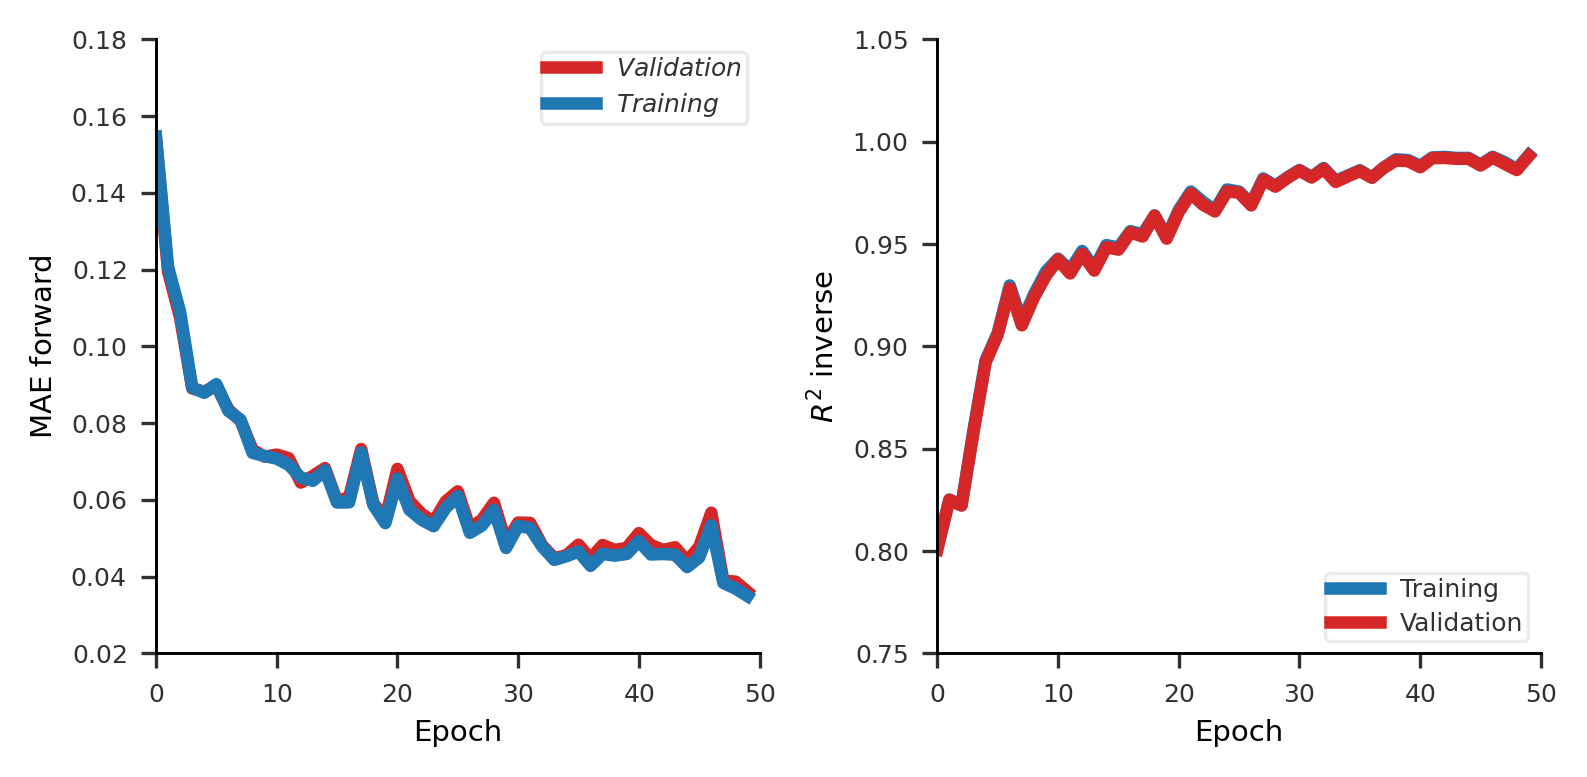

In [9]:
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_val'], '-', label =  '$Validation$', **val_marker, linewidth = 3)
ax.plot(best_model_hist['MAE_train'], '-', label = '$Training$', **train_marker, linewidth = 3)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ forward')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax = fig.add_subplot(122)
ax.plot(best_model_hist['r2_train_dvar'], '-', label = 'Training', **train_marker, linewidth = 3)
ax.plot(best_model_hist['r2_val_dvar'], '-', label =  'Validation', **val_marker, linewidth = 3)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$R^2$ inverse')
ax.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")
#ax.tick_params(labelsize = 16)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='lower right')
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_r2_uni.jpg')

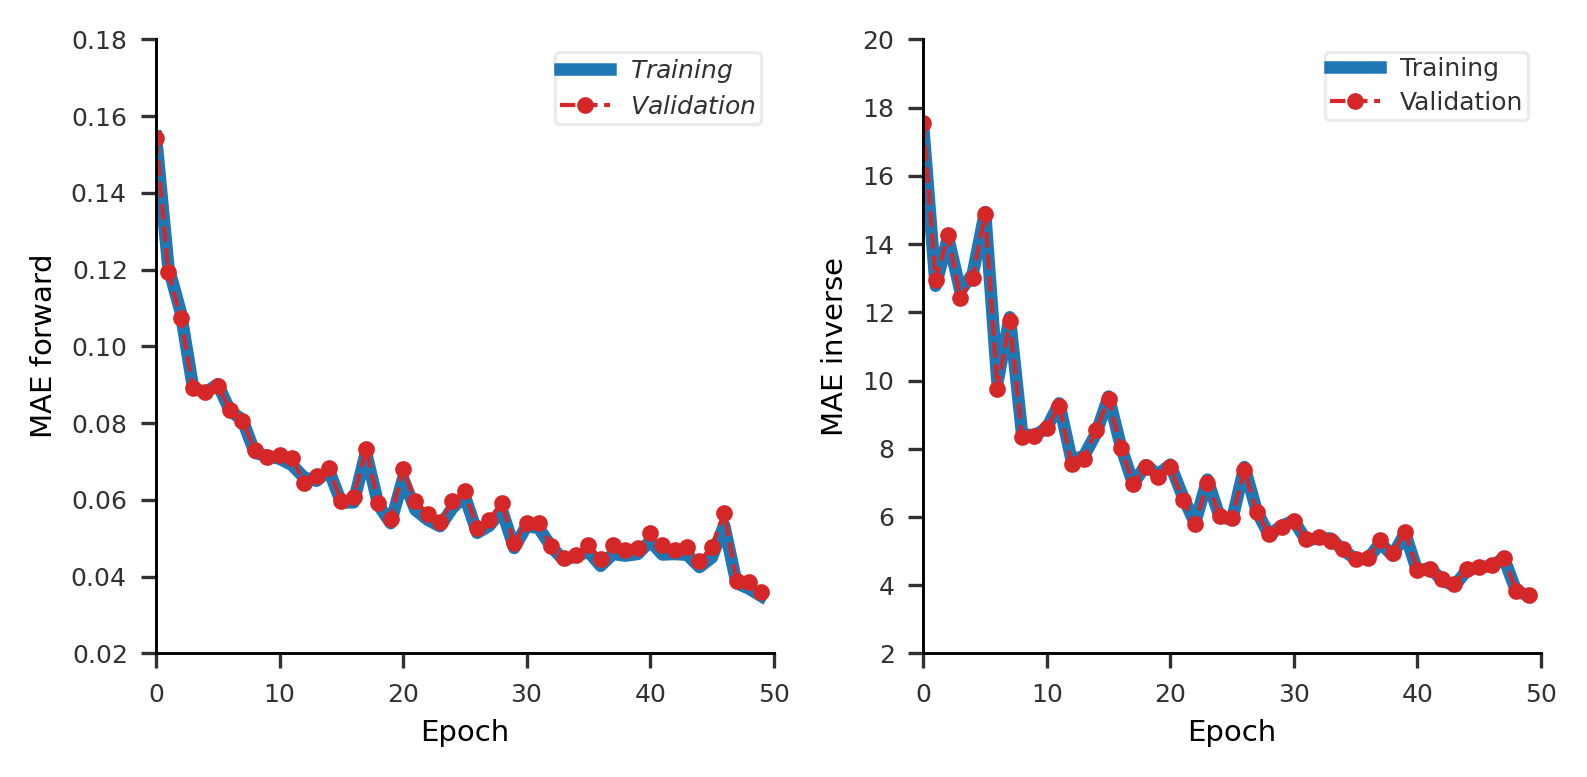

In [10]:
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_train'], '-', label = '$Training$', **train_marker, linewidth = 3)
ax.plot(best_model_hist['MAE_val'], 'o--', label =  '$Validation$', **val_marker, linewidth = 1)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ forward')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax = fig.add_subplot(122)
ax.plot(best_model_hist['MAE_train_dvar'], '-', label = 'Training', **train_marker, linewidth = 3)
ax.plot(best_model_hist['MAE_val_dvar'], 'o--', label =  'Validation', **val_marker, linewidth = 1)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ inverse')
ax.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")
#ax.tick_params(labelsize = 16)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_fw_inv_uni_ll.jpg')

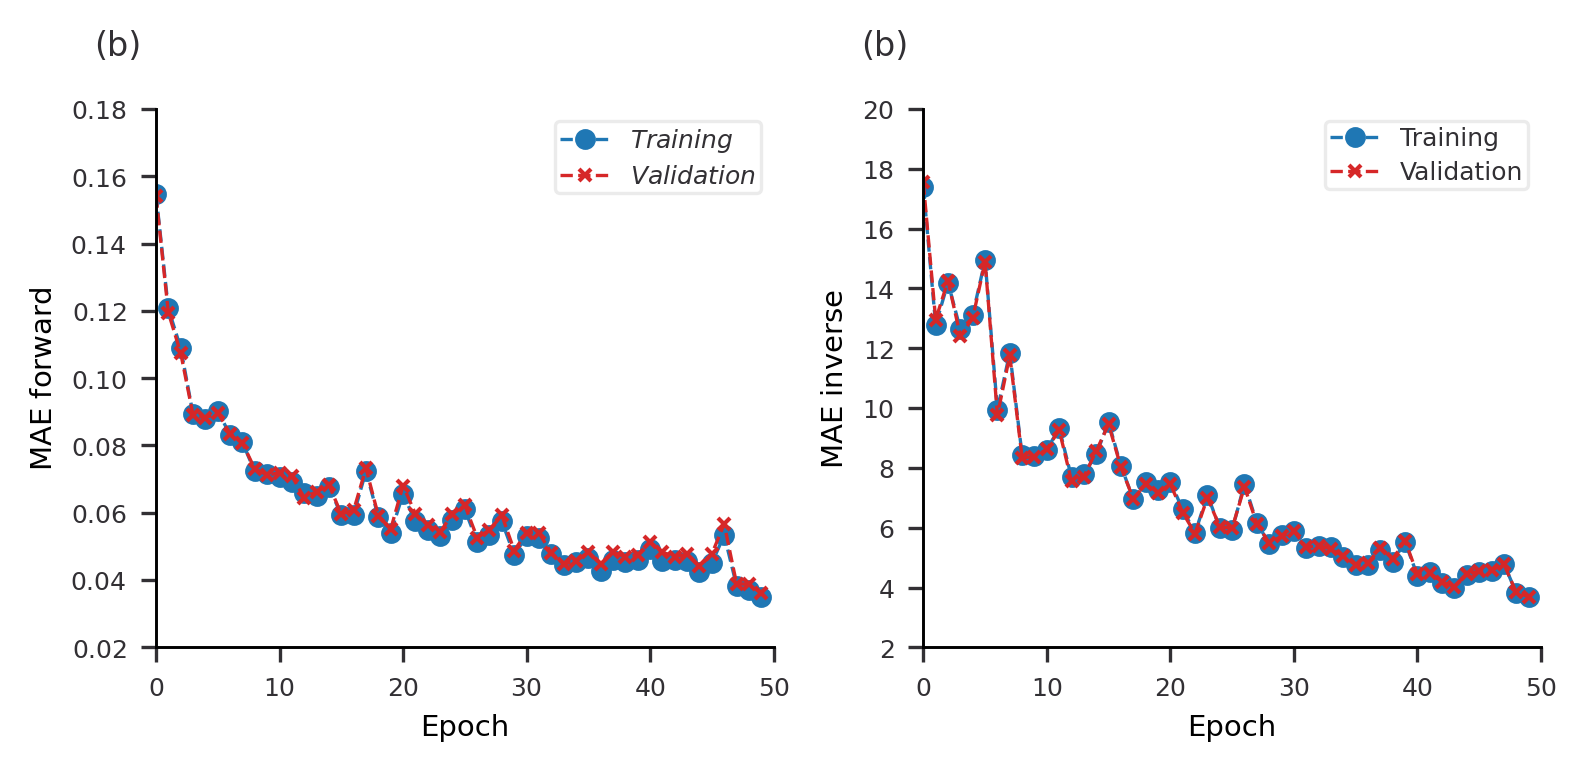

In [16]:
sizel = 8
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_train'], 'o--', label = '$Training$', **train_marker)

ax.plot(best_model_hist['MAE_val'], 'x--', label =  '$Validation$', **val_marker)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ forward')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax.text(-0.1, 1.1,'(b)' , transform=ax.transAxes, size=sizel)
ax2 = fig.add_subplot(122)
ax2.plot(best_model_hist['MAE_train_dvar'], 'o--', label = 'Training', **train_marker)
ax2.plot(best_model_hist['MAE_val_dvar'], 'x--', label =  'Validation', **val_marker)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('$\operatorname{MAE}$ inverse')
ax2.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")
#ax.tick_params(labelsize = 16)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax2.legend( loc='upper right')
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_fw_inv_uni_lo_label.jpg')

In [17]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_paper'

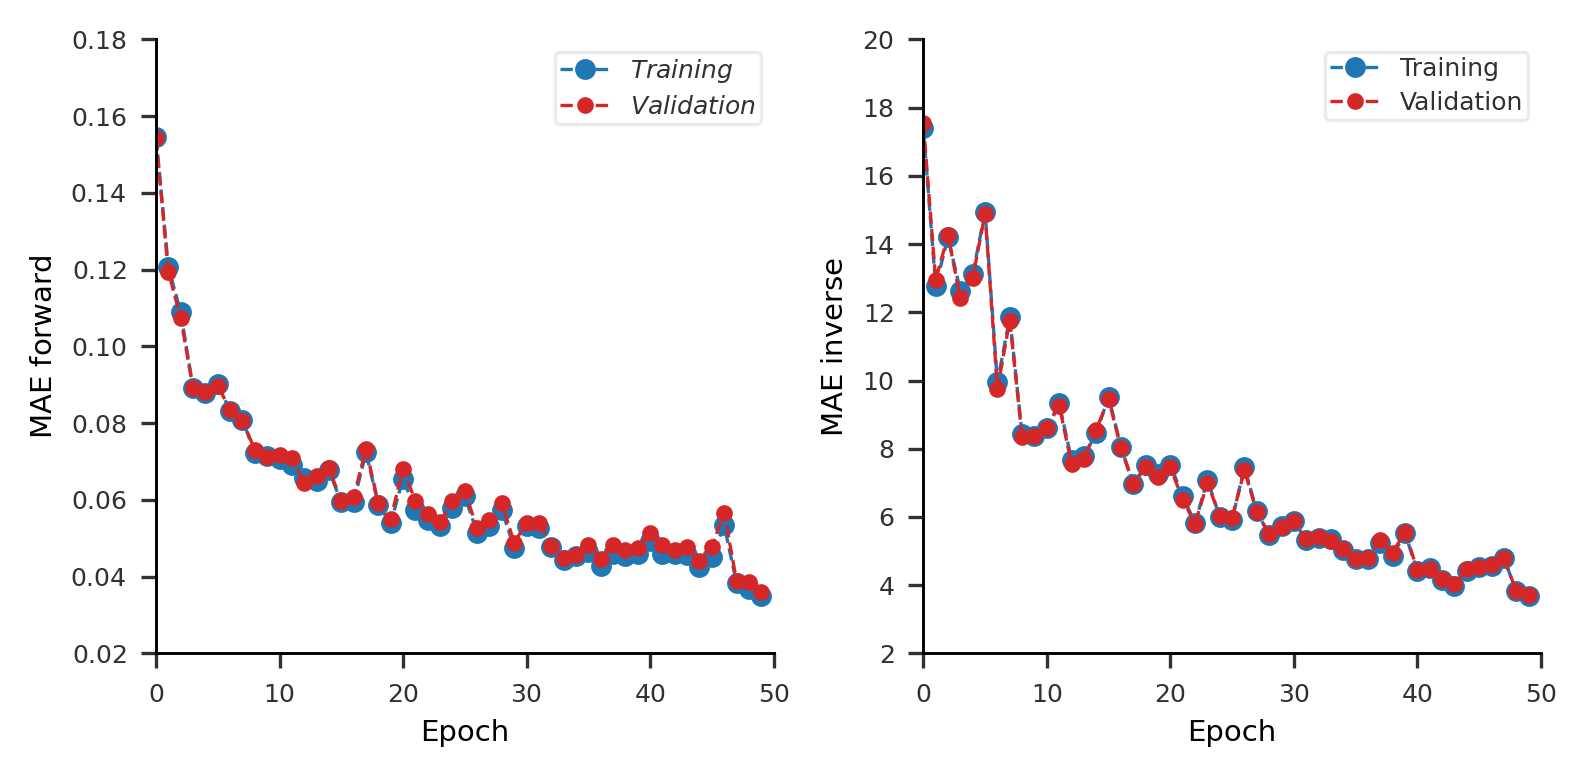

In [18]:
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_train'], 'o--', label = '$Training$', **train_marker)
ax.plot(best_model_hist['MAE_val'], 'o--', label =  '$Validation$', **val_marker)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ forward')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax = fig.add_subplot(122)
ax.plot(best_model_hist['MAE_train_dvar'], 'o--', label = 'Training', **train_marker)
ax.plot(best_model_hist['MAE_val_dvar'], 'o--', label =  'Validation', **val_marker)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ inverse')
ax.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")
#ax.tick_params(labelsize = 16)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_fw_inv_uni_oo.jpg')

In [19]:
test_datafile = '/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/test_dataset.hdf5'

In [20]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [21]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [22]:
qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.450_0  P11_0.450_1  P11_0.450_2  P11_0.450_3  P11_0.450_4  \
0       -14.249567   -14.255645   -14.507500   -14.680056   -15.015520   
1       -15.357966   -15.356447   -15.415657   -15.485341   -15.678013   
2       -13.195445   -13.283733   -13.501621   -14.031829   -14.624123   
3       -14.678004   -14.758633   -14.756907   -14.679797   -14.818027   
4       -14.642250   -14.655123   -14.697591   -14.766610   -14.893620   
...            ...          ...          ...          ...          ...   
19995   -13.519849   -13.548434   -13.733299   -14.010280   -14.366968   
19996   -13.560527   -13.575976   -13.921770   -14.286172   -14.776385   
19997   -15.232517   -15.193444   -15.169997   -15.195757   -15.218714   
19998   -13.774070   -13.742424   -13.913219   -14.135532   -14.380033   
19999   -13.698332   -13.788668   -14.029706   -14.485908   -15.117119   

       P11_0.450_5  P11_0.450_6  P11_0.450_7  P11_0.450_8  P11_0.450_9  ...  \
0       -15.342637   -15.685688   -16.093987   -16.525094   -16.883148  ...   
1       -15.904628   -16.040831   -16.323008   -16.534655   -16.735137  ...   
2       -15.242972   -15.844450   -16.364676   -16.873774   -17.137768  ...   
3       -14.746511   -14.773146   -14.791406   -14.868273   -14.811379  ...   
4       -15.053117   -15.233372   -15.417578   -15.615810   -15.850812  ...   
...            ...          ...          ...          ...          ...  ...   
19995   -14.774587   -15.168340   -15.575054   -16.073190   -16.429304  ...   
19996   -15.314668   -15.771797   -16.377409   -16.879992   -17.263830  ...   
19997   -15.205021   -15.242295   -15.229568   -15.386026   -15.382027  ...   
19998   -14.796613   -15.134599   -15.505851   -15.997019   -16.435669  ...   
19999   -15.681932   -16.262524   -16.849112   -17.331401   -17.823221  ...   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.008986       0.011796       0.023692       0.036562   
1           0.042301       0.035069       0.028339       0.015232   
2           0.010437       0.004794       0.008039       0.004423   
3          -0.012767      -0.011663      -0.005551       0.000130   
4          -0.230912      -0.204451      -0.153701      -0.110141   
...              ...            ...            ...            ...   
19995      -0.024592      -0.022325      -0.009004       0.024768   
19996       0.143587       0.110756       0.064874       0.024993   
19997      -0.120669      -0.098706      -0.079408      -0.062355   
19998      -0.262008      -0.268360      -0.273706      -0.258950   
19999      -0.008813      -0.004705       0.007044       0.017284   

       P12_0.630_174  P12_0.630_175  P12_0.630_176  P12_0.630_177  \
0           0.064321       0.072613       0.060981       0.040825   
1           0.017570       0.011389       0.010737       0.003372   
2           0.010559       0.007463       0.003394       0.000077   
3           0.002383       0.000197      -0.003553      -0.003930   
4          -0.082052      -0.053195      -0.033481      -0.018488   
...              ...            ...            ...            ...   
19995       0.060951       0.079190       0.080321       0.056089   
19996      -0.014172      -0.041965      -0.042386      -0.033147   
19997      -0.047149      -0.034015      -0.024070      -0.014213   
19998      -0.225730      -0.179923      -0.130186      -0.077070   
19999       0.023250       0.028227       0.028139       0.019542   

       P12_0.630_178  P12_0.630_179  
0           0.021078       0.005287  
1           0.002881       0.000893  
2           0.000123       0.000084  
3          -0.002103       0.000098  
4          -0.007938      -0.002281  
...              ...            ...  
19995       0.027868       0.007107  
19996      -0.013575      -0.002320  
19997      -0.007083      -0.001714  
19998      -0.034912      -0.008354  
19999       0.010176       0.002549  

[20000 rows x 1077 columns]

In [23]:
qoi_pred_fw.describe()

P11_0.450_0   P11_0.450_1   P11_0.450_2   P11_0.450_3   P11_0.450_4  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean     -14.672736    -14.687268    -14.859580    -15.083064    -15.403626   
std        1.129505      1.114552      1.062853      1.026875      1.035947   
min      -21.788386    -21.811163    -21.767974    -21.886237    -22.306726   
25%      -15.208666    -15.205796    -15.337135    -15.511386    -15.837745   
50%      -14.436717    -14.446078    -14.596350    -14.796443    -15.125194   
75%      -13.855596    -13.885230    -14.099308    -14.347104    -14.671596   
max      -12.996253    -12.997326    -13.288562    -13.797912    -14.036565   

        P11_0.450_5   P11_0.450_6   P11_0.450_7   P11_0.450_8   P11_0.450_9  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean     -15.759763    -16.100502    -16.451824    -16.780274    -17.092319   
std        1.082940      1.177144      1.272672      1.361424      1.451677   
min      -22.726503    -23.318468    -23.804599    -24.272482    -24.778398   
25%      -16.234373    -16.671461    -17.143105    -17.572604    -17.970651   
50%      -15.535994    -15.910159    -16.306821    -16.687305    -17.052679   
75%      -14.984517    -15.231950    -15.483735    -15.727124    -15.949611   
max      -14.143917    -14.128368    -14.201417    -14.278469    -14.345991   

       ...  P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
count  ...   20000.000000   20000.000000   20000.000000   20000.000000   
mean   ...      -0.123941      -0.114717      -0.102566      -0.087044   
std    ...       0.152161       0.135110       0.117621       0.100844   
min    ...      -0.516474      -0.476829      -0.414757      -0.341780   
25%    ...      -0.228285      -0.210653      -0.188409      -0.161530   
50%    ...      -0.094799      -0.090392      -0.082471      -0.070983   
75%    ...      -0.011918      -0.008360      -0.005960      -0.003562   
max    ...       0.416344       0.368449       0.322638       0.243085   

       P12_0.630_174  P12_0.630_175  P12_0.630_176  P12_0.630_177  \
count   20000.000000   20000.000000   20000.000000   20000.000000   
mean       -0.068596      -0.049116      -0.031042      -0.016959   
std         0.086853       0.075411       0.063258       0.046710   
min        -0.324657      -0.319389      -0.287635      -0.243049   
25%        -0.130924      -0.099586      -0.067317      -0.038456   
50%        -0.056667      -0.041016      -0.026433      -0.014213   
75%         0.000015       0.002350       0.002884       0.002672   
max         0.165715       0.120992       0.126173       0.140613   

       P12_0.630_178  P12_0.630_179  
count   20000.000000   20000.000000  
mean       -0.006729      -0.001607  
std         0.025530       0.006990  
min        -0.169865      -0.048806  
25%        -0.016478      -0.004117  
50%        -0.005890      -0.001474  
75%         0.001748       0.000555  
max         0.103439       0.032228  

[8 rows x 1077 columns]

In [24]:
dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
dvar_pred_iv

V_tot  R_median       GSD         n     k_532       AAE
0      2325.413768  1.357443  1.421760  1.346221  0.060342  5.812247
1      1135.245885  0.863170  1.414260  1.559604  0.172946  1.021645
2      4991.611820  2.031067  1.404978  1.556748  0.178853  1.164190
3      4960.556016  0.253449  1.402615  1.331327  0.037079  4.435317
4      2553.766474  0.804352  1.439940  1.436156  0.119266  3.176575
...            ...       ...       ...       ...       ...       ...
19995  4772.554564  1.486830  1.413734  1.334562  0.048354  4.664656
19996  3513.545010  1.834870  1.404642  1.468014  0.011932  5.816171
19997  2072.540701  0.382844  1.431329  1.389230  0.042805  3.206604
19998  4027.345042  1.369324  1.407162  1.562527  0.013319  4.527068
19999  3139.319569  2.065954  1.426161  1.336717  0.099202  1.237793

[20000 rows x 6 columns]

In [25]:
wl = ['450', '532','630']
wl_P11_450 = []
wl_P11_532 = []
wl_P11_630 = []
wl_P12_450 = []
wl_P12_532 = []
wl_P12_630 = []
for key in qoi_columns:
    if 'P11_0.450' in key:
        wl_P11_450.append(key)
    elif 'P11_0.532' in key:
        wl_P11_532.append(key)
    elif 'P11_0.630' in key:
        wl_P11_630.append(key)
    elif 'P12_0.450' in key:
        wl_P12_450.append(key)
    elif 'P12_0.532' in key:
        wl_P12_532.append(key)
    elif 'P12_0.630' in key:
        wl_P12_630.append(key)
        
      

In [26]:
wl_list_P11 = [wl_P11_450,wl_P11_532,wl_P11_630]
wl_list_P12 = [wl_P12_450, wl_P12_532, wl_P12_630]

In [27]:
color1 = ['orange','red','darkred','dodgerblue','blue','midnightblue']

In [28]:
pred_marker450 = {'marker':'.','markersize':6,'markerfacecolor': color1[0], 'markeredgecolor': color1[0], 'color': color1[0],
             'alpha': 0.9}
test_marker450 = {'linewidth':5,'color': color1[3],'alpha': 0.9}
pred_marker532 = {'marker':'.','markersize':6,'markerfacecolor': color1[1], 'markeredgecolor': color1[1], 'color': color1[1],
             'alpha': 0.9}
test_marker532 = {'linewidth':5,'color': color1[4], 'alpha': 0.9}
pred_marker630 = {'marker':'.','markersize':6,'markerfacecolor': color1[2], 'markeredgecolor': color1[2], 'color': color1[2],
             'alpha': 0.9}
test_marker630 = {'linewidth':5,'color': color1[5], 'alpha': 0.9}

In [29]:
presentation_plot_index = [0,6,8]
presentation_plot_index = [3000,4000,10000]
presentation_plot_index = [7804,13990,16732,4556,1759,4955]
presentation_plot_index = [1000,2000,3000,4000,5000,6000]

presentation_plot_index = [4000,1000,6000,3000,2000,5000]

In [30]:
dvar_pred_iv['k_450']=dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
dvar_pred_iv['k_630']=dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])

In [31]:
dvar_test['k_450']=dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
dvar_test['k_630']=dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])

In [32]:
x_450 = 450*np.ones(len(presentation_plot_index))
x_532 = 532*np.ones(len(presentation_plot_index))
x_630 = 630*np.ones(len(presentation_plot_index))


In [33]:
dvar_pred_iv['n']

0        1.346221
1        1.559604
2        1.556748
3        1.331327
4        1.436156
           ...   
19995    1.334562
19996    1.468014
19997    1.389230
19998    1.562527
19999    1.336717
Name: n, Length: 20000, dtype: float64

[Text(450, 0, '450'), Text(532, 0, '532'), Text(630, 0, '630')]

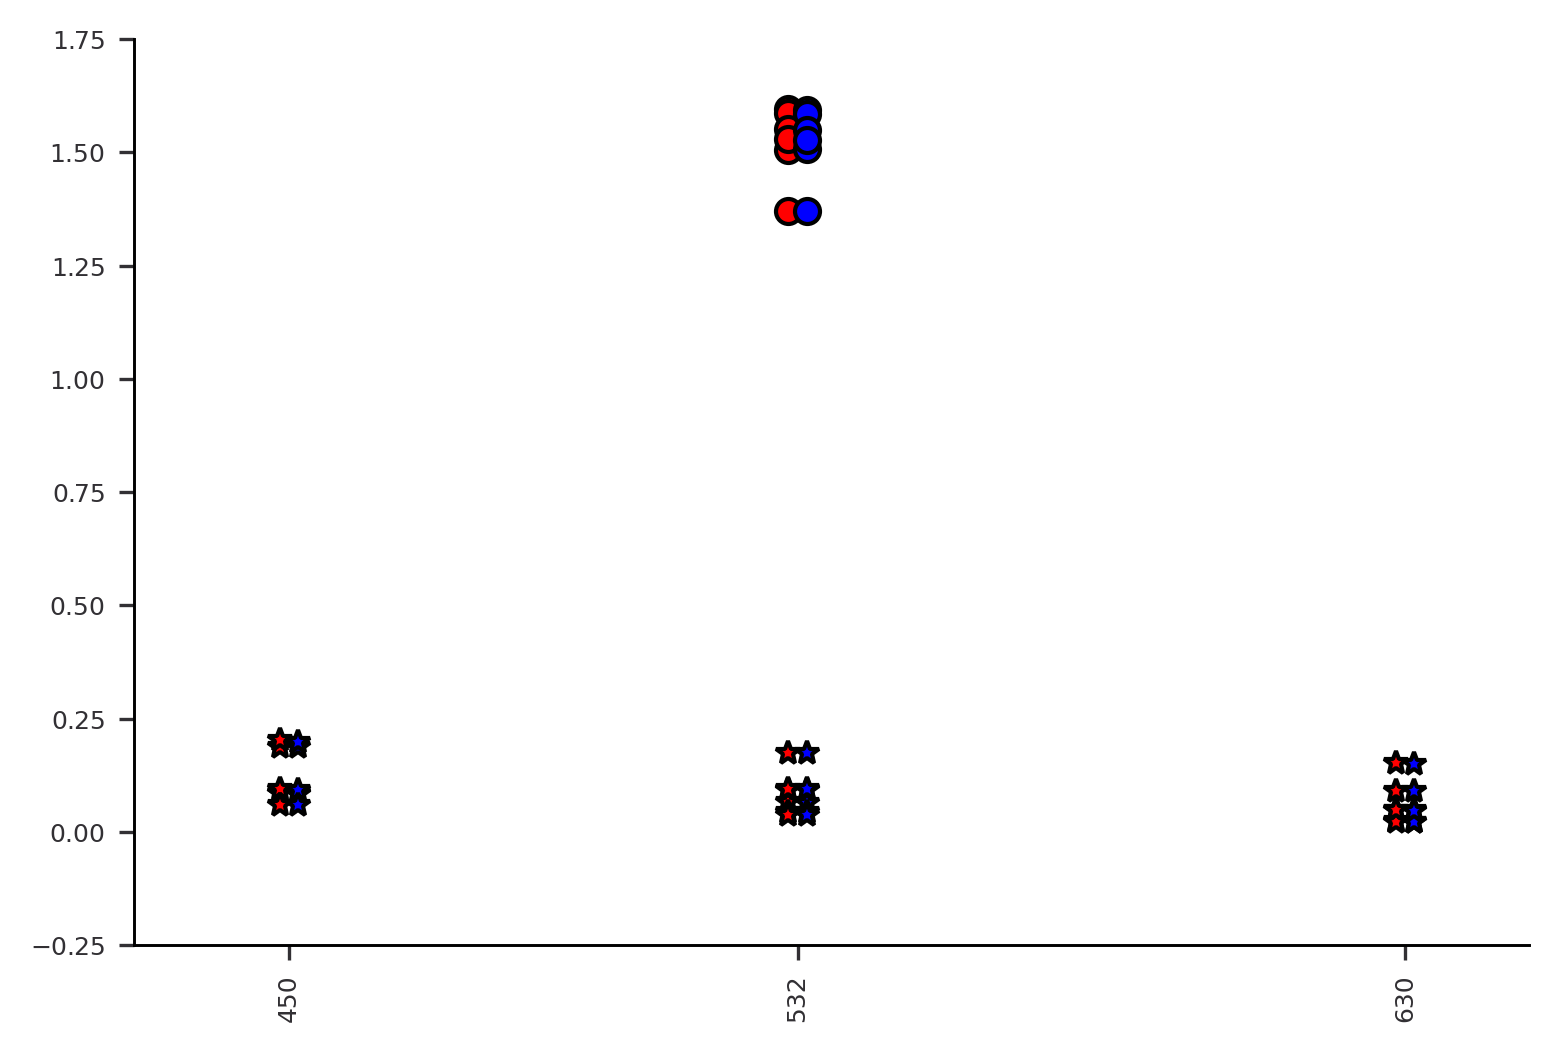

In [34]:
fig,ax = plt.subplots()
plt.plot(x_450-1.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index],'r*')
plt.plot(x_450+1.5,dvar_test['k_450'].iloc[presentation_plot_index],'b*')
plt.plot(x_532-1.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index],'r*')
plt.plot(x_532+1.5,dvar_test['k_532'].iloc[presentation_plot_index],'b*')

plt.plot(x_532-1.5,dvar_pred_iv['n'].iloc[presentation_plot_index],'ro')
plt.plot(x_532+1.5,dvar_test['n'].iloc[presentation_plot_index],'bo')


plt.plot(x_630-1.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index],'r*')
plt.plot(x_630+1.5,dvar_test['k_630'].iloc[presentation_plot_index],'b*')
xlabel = [450,532,630]
x_pos = xlabel
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, rotation='vertical')


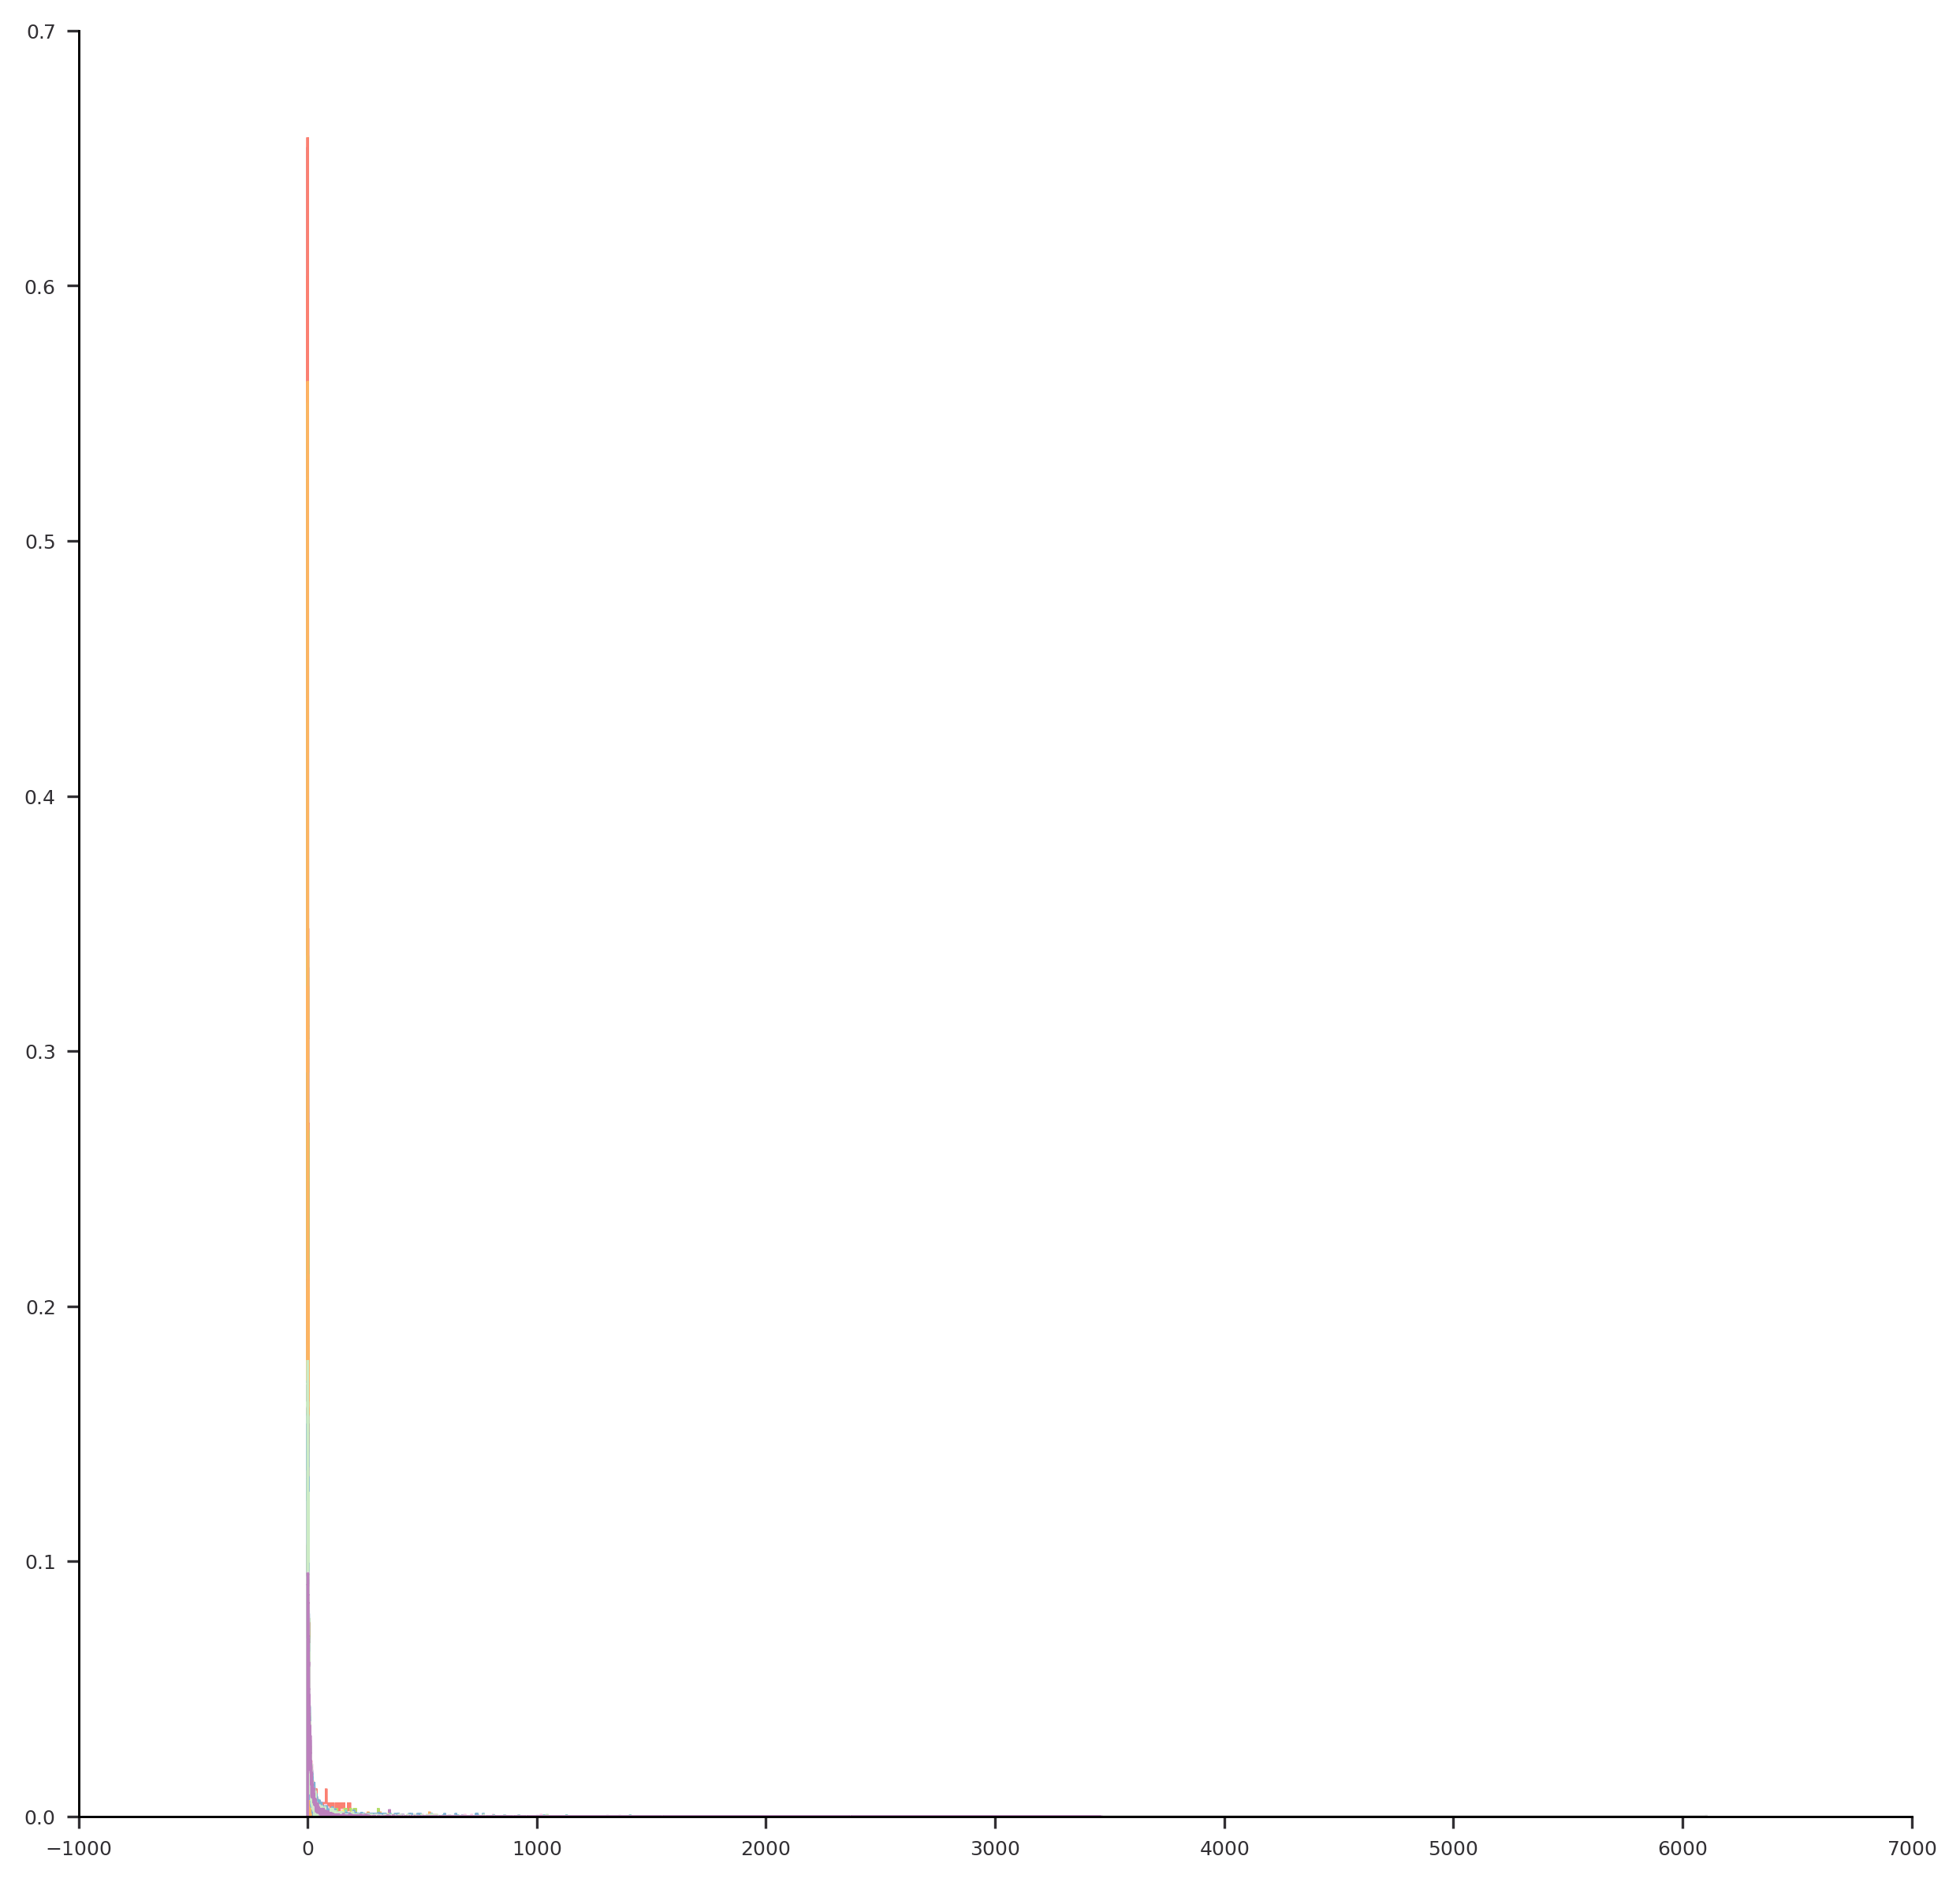

In [35]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid',histtype = 'step')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid',histtype = 'step')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = Vtot1*(np.exp(-(np.log(x1) - np.log(mu1))**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = Vtot2*(np.exp(-(np.log(x2) - np.log(mu2))**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


4000
1000
6000
3000
2000
5000


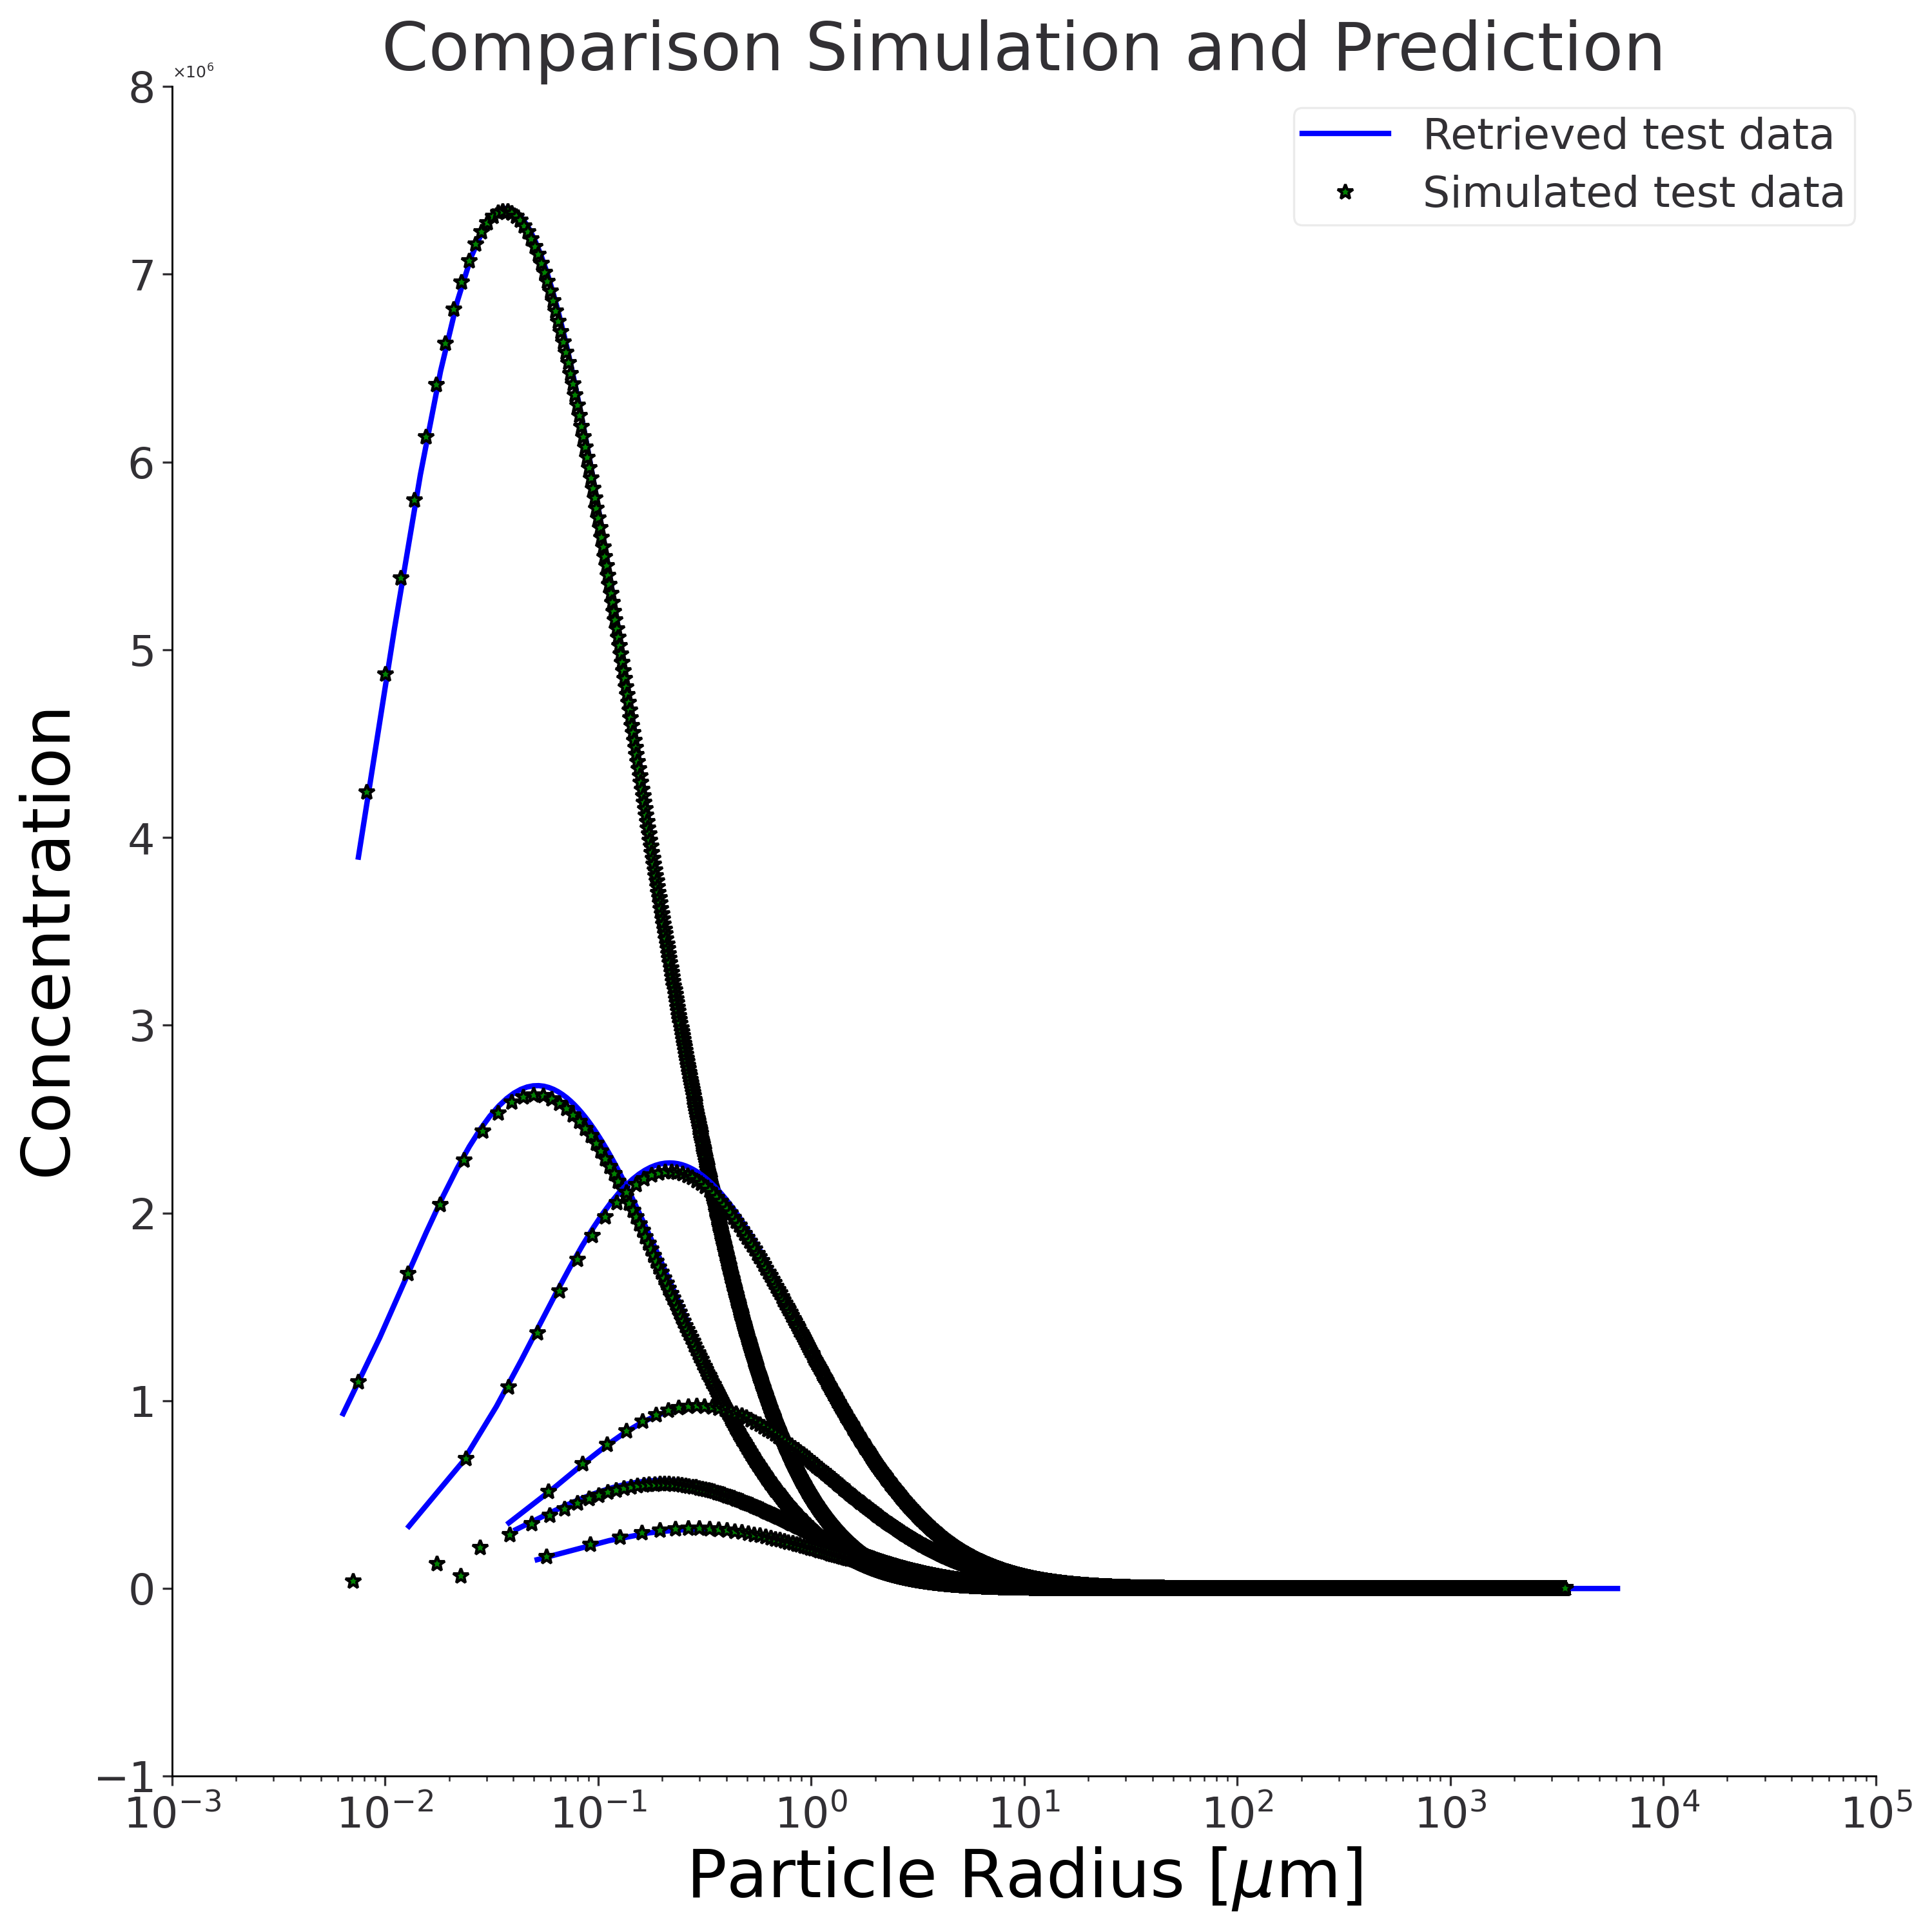

In [36]:
fig, ax = plt.subplots(figsize = (10,10))
for datalen in (0,1,2,3,4,5):
    print(presentation_plot_index[datalen])
    #fig, ax = plt.subplots(figsize = (10,10))

     
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Predicted test data', 'test data'], fontsize = 16)
ax.legend(fontsize = 16)   

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration ',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')
#plt.yscale('log')
fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')

In [37]:
color1

['orange', 'red', 'darkred', 'dodgerblue', 'blue', 'midnightblue']

In [38]:
color1 = ['gold','orange','orangered','red','firebrick','darkred']

color2 = ['skyblue','dodgerblue','royalblue', 'blue', 'darkblue','midnightblue']


In [39]:
fontsize1 = 20

In [40]:
presentation_plot_index

[4000, 1000, 6000, 3000, 2000, 5000]

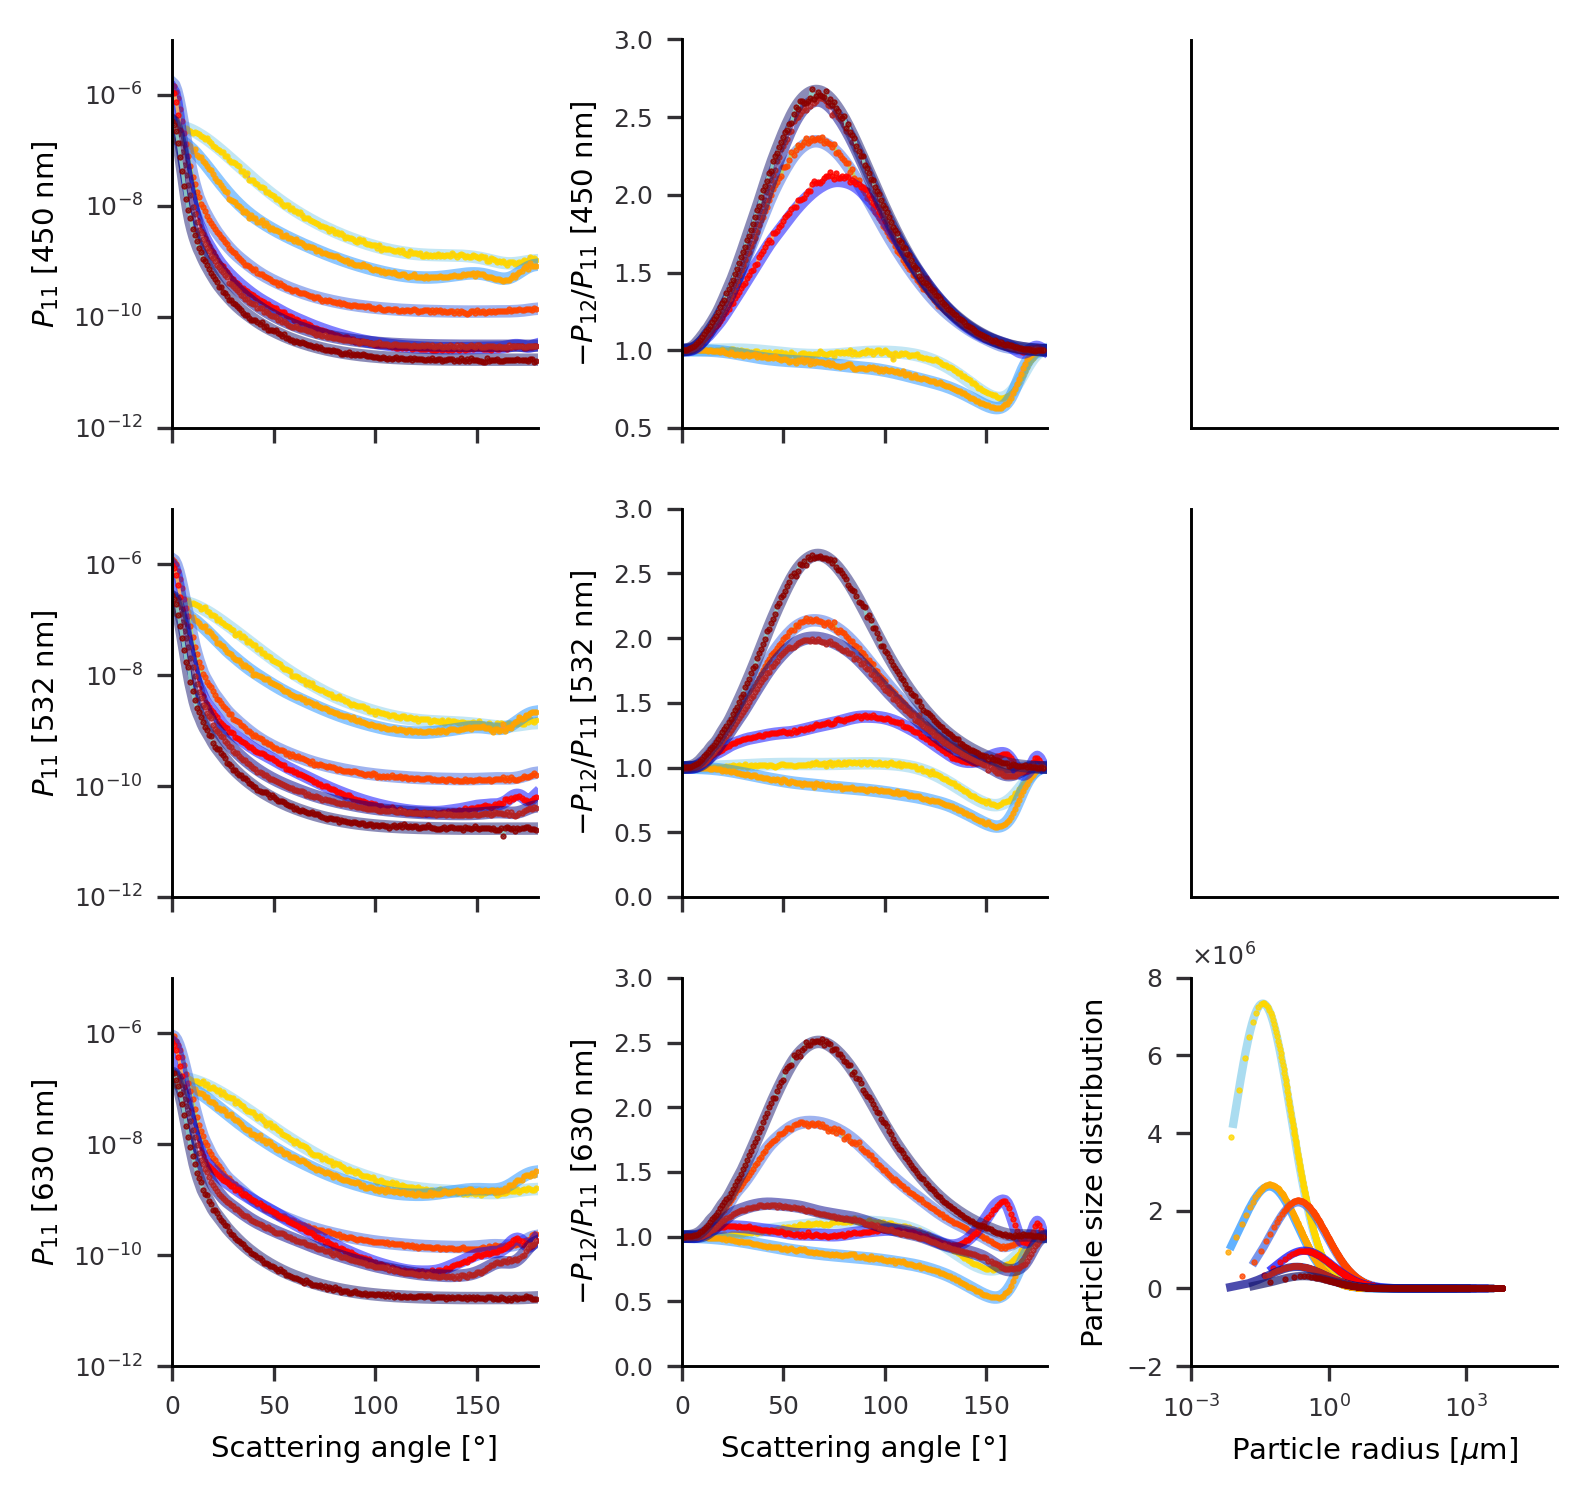

In [41]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))
fig = plt.figure(figsize=(5.3,5))

ax1 = fig.add_subplot(331)
#ax1 = plt.subplot(3,3,1)

ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334, sharex=ax1)
ax5 = fig.add_subplot(335,sharex=ax2)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337,sharex=ax1)
ax8 = fig.add_subplot(338,sharex=ax2)
ax9 = fig.add_subplot(339)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':3,'color': color2[i], 'alpha': 0.5}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.5,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}

    ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)
    ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax1.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)
    ax1.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
      
    
    ax5.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_test[wl_P12_532])).iloc[index],**test_marker532)
    ax5.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_test[wl_P12_630])).iloc[index],**test_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_test[wl_P12_450])).iloc[index],**test_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    i = i+1
ax1.set_yscale('log')
#ax1.set_xlabel('Scattering angle [°]',fontsize =fontsize1)
ax1.set_ylabel('$P_{11}$ [450 nm]')
#ax1.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax1.legend(['test 450', 'pred 450'])
ax1.set_xlim(0, 180)
#ax2.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax2.set_ylabel('$-P_{12}/P_{11}$ [450 nm]')
#ax2.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax2.legend(['test 450', 'pred 450'])
ax2.set_xlim(0, 180)

ax4.set_yscale('log')
#ax4.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax4.set_ylabel('$P_{11}$ [532 nm]')
#ax4.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax4.legend(['test 532', 'pred 532'])
ax4.set_xlim(0, 180)
#ax5.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax5.set_ylabel('$-P_{12}/P_{11}$ [532 nm]')
#fig.tight_layout() 
#ax5.legend(['test 532', 'pred 532'])
ax5.set_xlim(0, 180)
ax7.set_yscale('log')
ax7.set_xlabel('Scattering angle [°]')
ax7.set_ylabel('$P_{11}$ [630 nm]')
#fig.tight_layout() 
#ax7.legend(['test 630', 'pred 630'])
ax7.set_xlim(0, 180)
ax8.set_xlabel('Scattering angle [°]')
ax8.set_ylabel('$-P_{12}/P_{11}$ [630 nm]')
ax8.set_xlim(0, 180)    
#fig.tight_layout() 
#ax8.legend(['test 630', 'pred 630'])



#ax2.legend(['test 532', 'pred 532','test 630', 'pred 630','test 450', 'pred 450'], fontsize = 16)





for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':2,'color': color2[datalen], 'alpha': 0.7}
    pred_marker532 = {'markersize':0.5,'markerfacecolor': color1[datalen], 'markeredgecolor': color1[datalen], 'alpha': 0.9}
  #  if datalen == 0:        
  #      ax6.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532,label = 'test')
  #      ax6.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532,marker = 'o', linestyle = 'None',label ='pred')
  #  else:
    ax9.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)#, label = 'Simulated test data')
    ax9.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532,marker = 'o', linestyle = 'None')#,label ='Retrieved test data')
            
#ax6.legend(fontsize = 16)   
ax9.set_xlabel('Particle radius [$\mu$m]')
ax9.set_ylabel('Particle size distribution')   
fig.align_labels()
ax9.set_xscale('log')

ax3.get_yaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax6.get_xaxis().set_visible(False)

fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred.jpg')







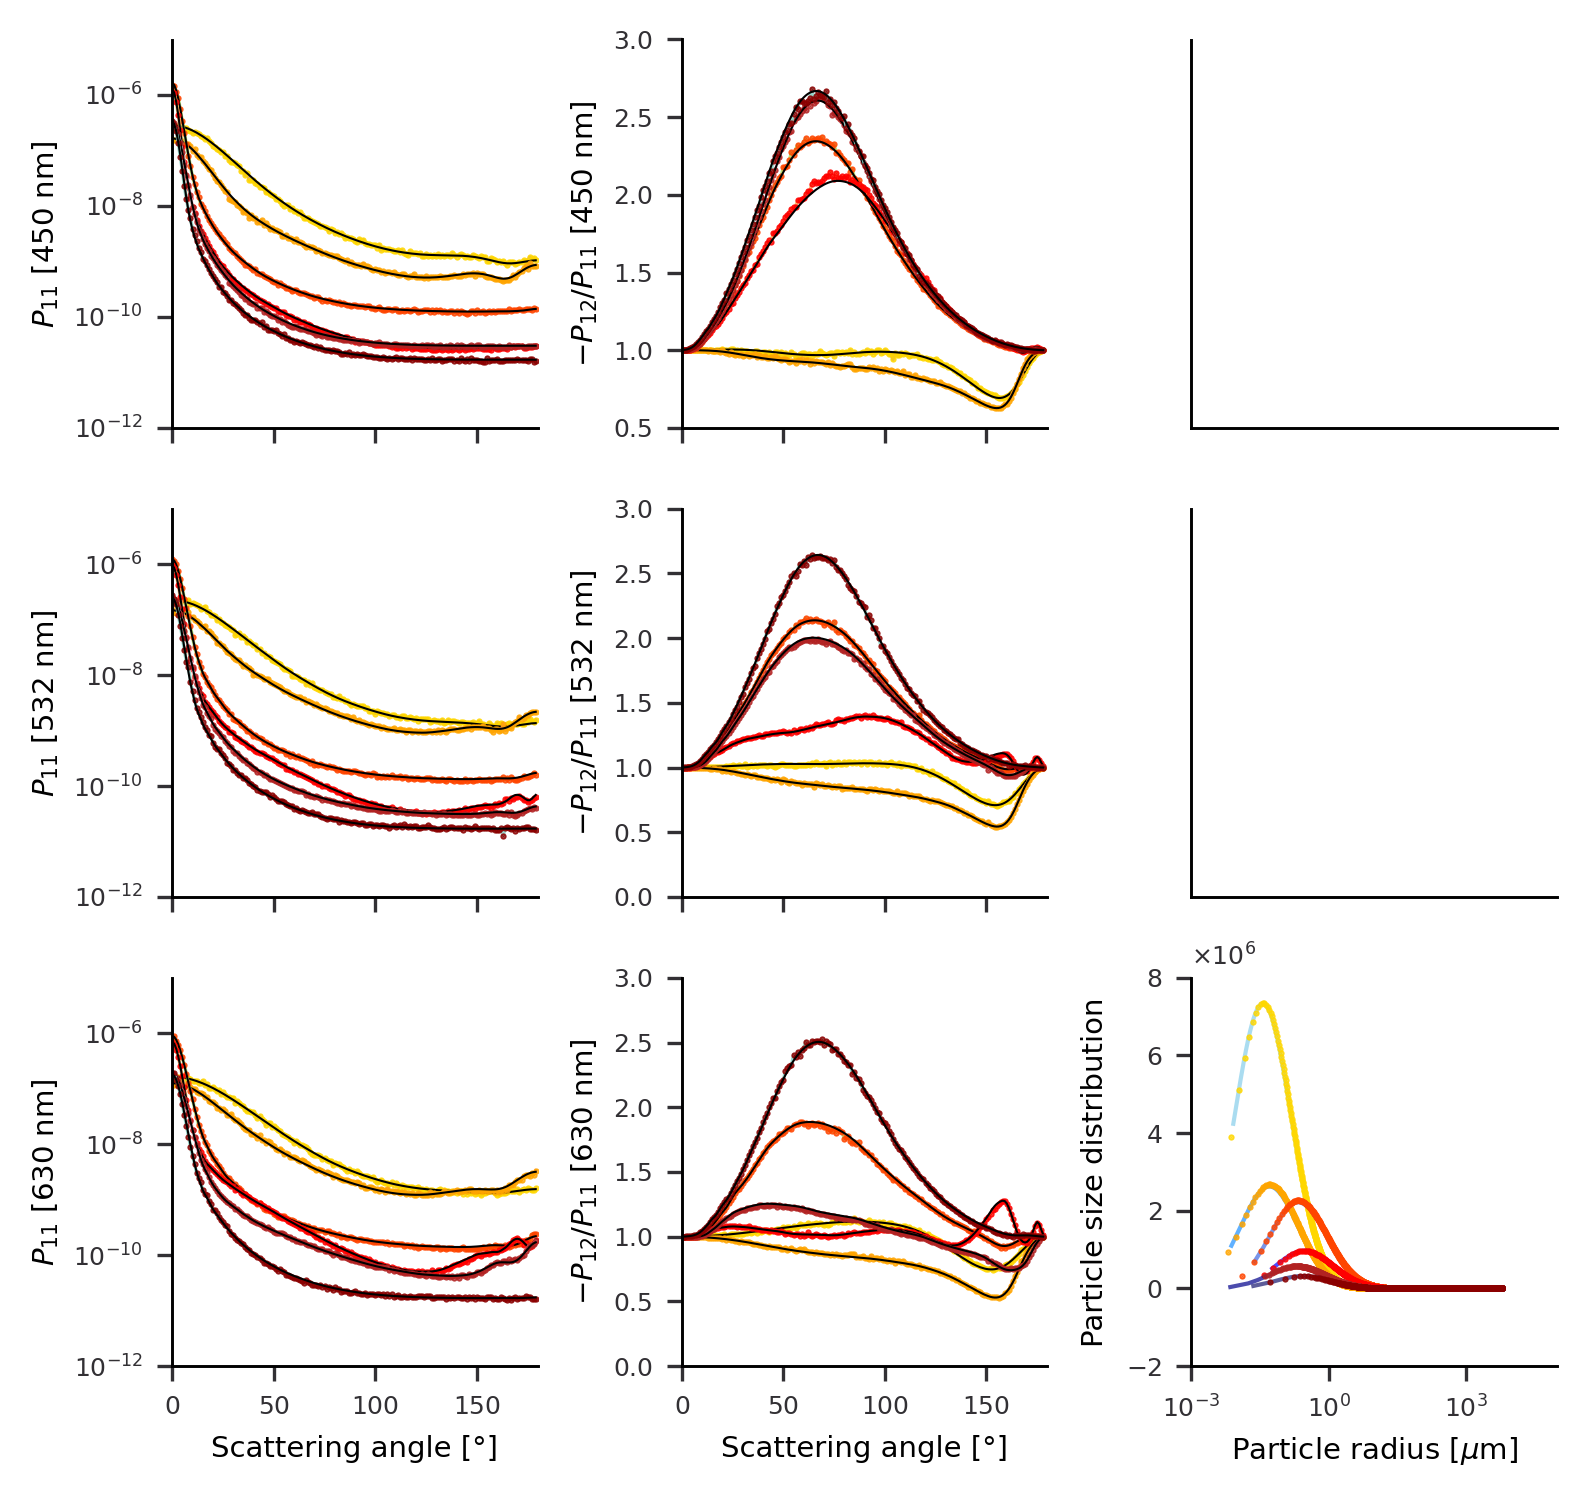

In [42]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))
fig = plt.figure(figsize=(5.3,5))

ax1 = fig.add_subplot(331)
#ax1 = plt.subplot(3,3,1)

ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334, sharex=ax1)
ax5 = fig.add_subplot(335,sharex=ax2)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337,sharex=ax1)
ax8 = fig.add_subplot(338,sharex=ax2)
ax9 = fig.add_subplot(339)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.5,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}

    ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax1.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax1.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)
      
    
    ax5.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax5.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_test[wl_P12_630])).iloc[index],**test_marker532)

    ax2.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_test[wl_P12_450])).iloc[index],**test_marker532)

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    i = i+1
ax1.set_yscale('log')
#ax1.set_xlabel('Scattering angle [°]',fontsize =fontsize1)
ax1.set_ylabel('$P_{11}$ [450 nm]')
#ax1.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax1.legend(['test 450', 'pred 450'])
ax1.set_xlim(0, 180)
#ax2.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax2.set_ylabel('$-P_{12}/P_{11}$ [450 nm]')
#ax2.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax2.legend(['test 450', 'pred 450'])
ax2.set_xlim(0, 180)

ax4.set_yscale('log')
#ax4.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax4.set_ylabel('$P_{11}$ [532 nm]')
#ax4.tick_params(labelsize = 16)    
#fig.tight_layout() 
#ax4.legend(['test 532', 'pred 532'])
ax4.set_xlim(0, 180)
#ax5.set_xlabel('Scattering angle [°]',fontsize = fontsize1)
ax5.set_ylabel('$-P_{12}/P_{11}$ [532 nm]')
#fig.tight_layout() 
#ax5.legend(['test 532', 'pred 532'])
ax5.set_xlim(0, 180)
ax7.set_yscale('log')
ax7.set_xlabel('Scattering angle [°]')
ax7.set_ylabel('$P_{11}$ [630 nm]')
#fig.tight_layout() 
#ax7.legend(['test 630', 'pred 630'])
ax7.set_xlim(0, 180)
ax8.set_xlabel('Scattering angle [°]')
ax8.set_ylabel('$-P_{12}/P_{11}$ [630 nm]')
ax8.set_xlim(0, 180)    
#fig.tight_layout() 
#ax8.legend(['test 630', 'pred 630'])



#ax2.legend(['test 532', 'pred 532','test 630', 'pred 630','test 450', 'pred 450'], fontsize = 16)





for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':1,'color': color2[datalen], 'alpha': 0.7}
    pred_marker532 = {'markersize':0.5,'markerfacecolor': color1[datalen], 'markeredgecolor': color1[datalen], 'alpha': 0.9}
  #  if datalen == 0:        
  #      ax6.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532,label = 'test')
  #      ax6.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532,marker = 'o', linestyle = 'None',label ='pred')
  #  else:
    ax9.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)#, label = 'Simulated test data')
    ax9.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532,marker = 'o', linestyle = 'None')#,label ='Retrieved test data')
            
#ax6.legend(fontsize = 16)   
ax9.set_xlabel('Particle radius [$\mu$m]')
ax9.set_ylabel('Particle size distribution')   
fig.align_labels()
ax9.set_xscale('log')

ax3.get_yaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax6.get_xaxis().set_visible(False)

fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred.jpg')







In [43]:
color1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:cyan']
colorg = 'tab:gray'

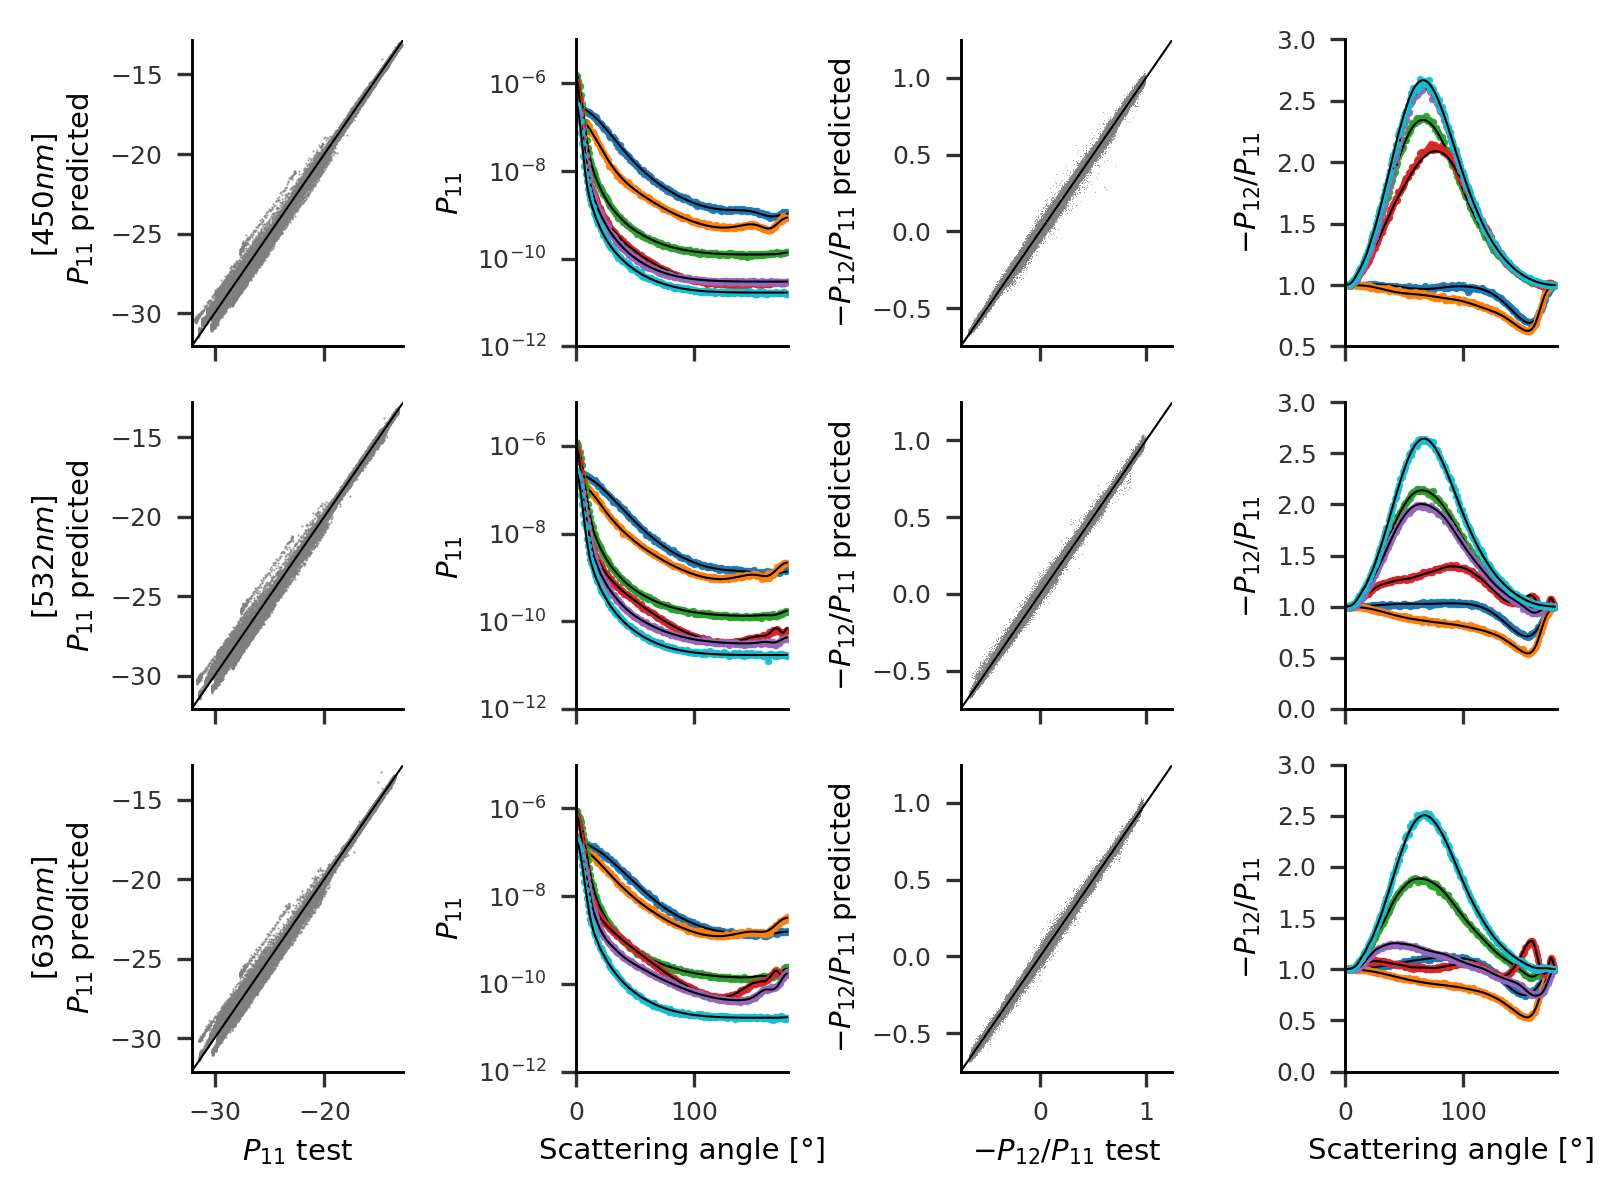

In [44]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))
fig = plt.figure(figsize=(5.3,4))

ax1 = fig.add_subplot(3,4,1)
#ax1 = plt.subplot(3,3,1)

ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5,sharex=ax1)
ax6 = fig.add_subplot(3,4,6,sharex=ax2)
ax7 = fig.add_subplot(3,4,7,sharex=ax3)
ax8 = fig.add_subplot(3,4,8,sharex=ax4)
ax9 = fig.add_subplot(3,4,9,sharex=ax1)
ax10 = fig.add_subplot(3,4,10,sharex=ax2)
ax11 = fig.add_subplot(3,4,11,sharex=ax3)
ax12 = fig.add_subplot(3,4,12,sharex=ax4)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),(np.exp(qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),(np.exp(qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),(np.exp(qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11}$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11}$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11}$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-32.1,-12.8)
ax1.set_ylim(-32.1,-12.8)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-32.1,-12.8)
ax5.set_ylim(-32.1,-12.8)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-32.1,-12.8)
ax9.set_ylim(-32.1,-12.8)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.75,1.25)
ax3.set_ylim(-0.75,1.25)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.75,1.25)
ax7.set_ylim(-0.75,1.25)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.75,1.25)
ax11.set_ylim(-0.75,1.25)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred.jpg')








In [45]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker

In [47]:
#df_new.columns

In [48]:
df_new_table = pd.DataFrame()
df_new_table['V_tot'] = df_new['V_tot']
df_new_table['R_median']=df_new['R_median']
df_new_table['GSD']=df_new['GSD']
df_new_table['n']=df_new['n']
df_new_table['k_532']=df_new['k_532']
df_new_table['AAE']=df_new['AAE']
df_new_table

NameError: name 'df_new' is not defined

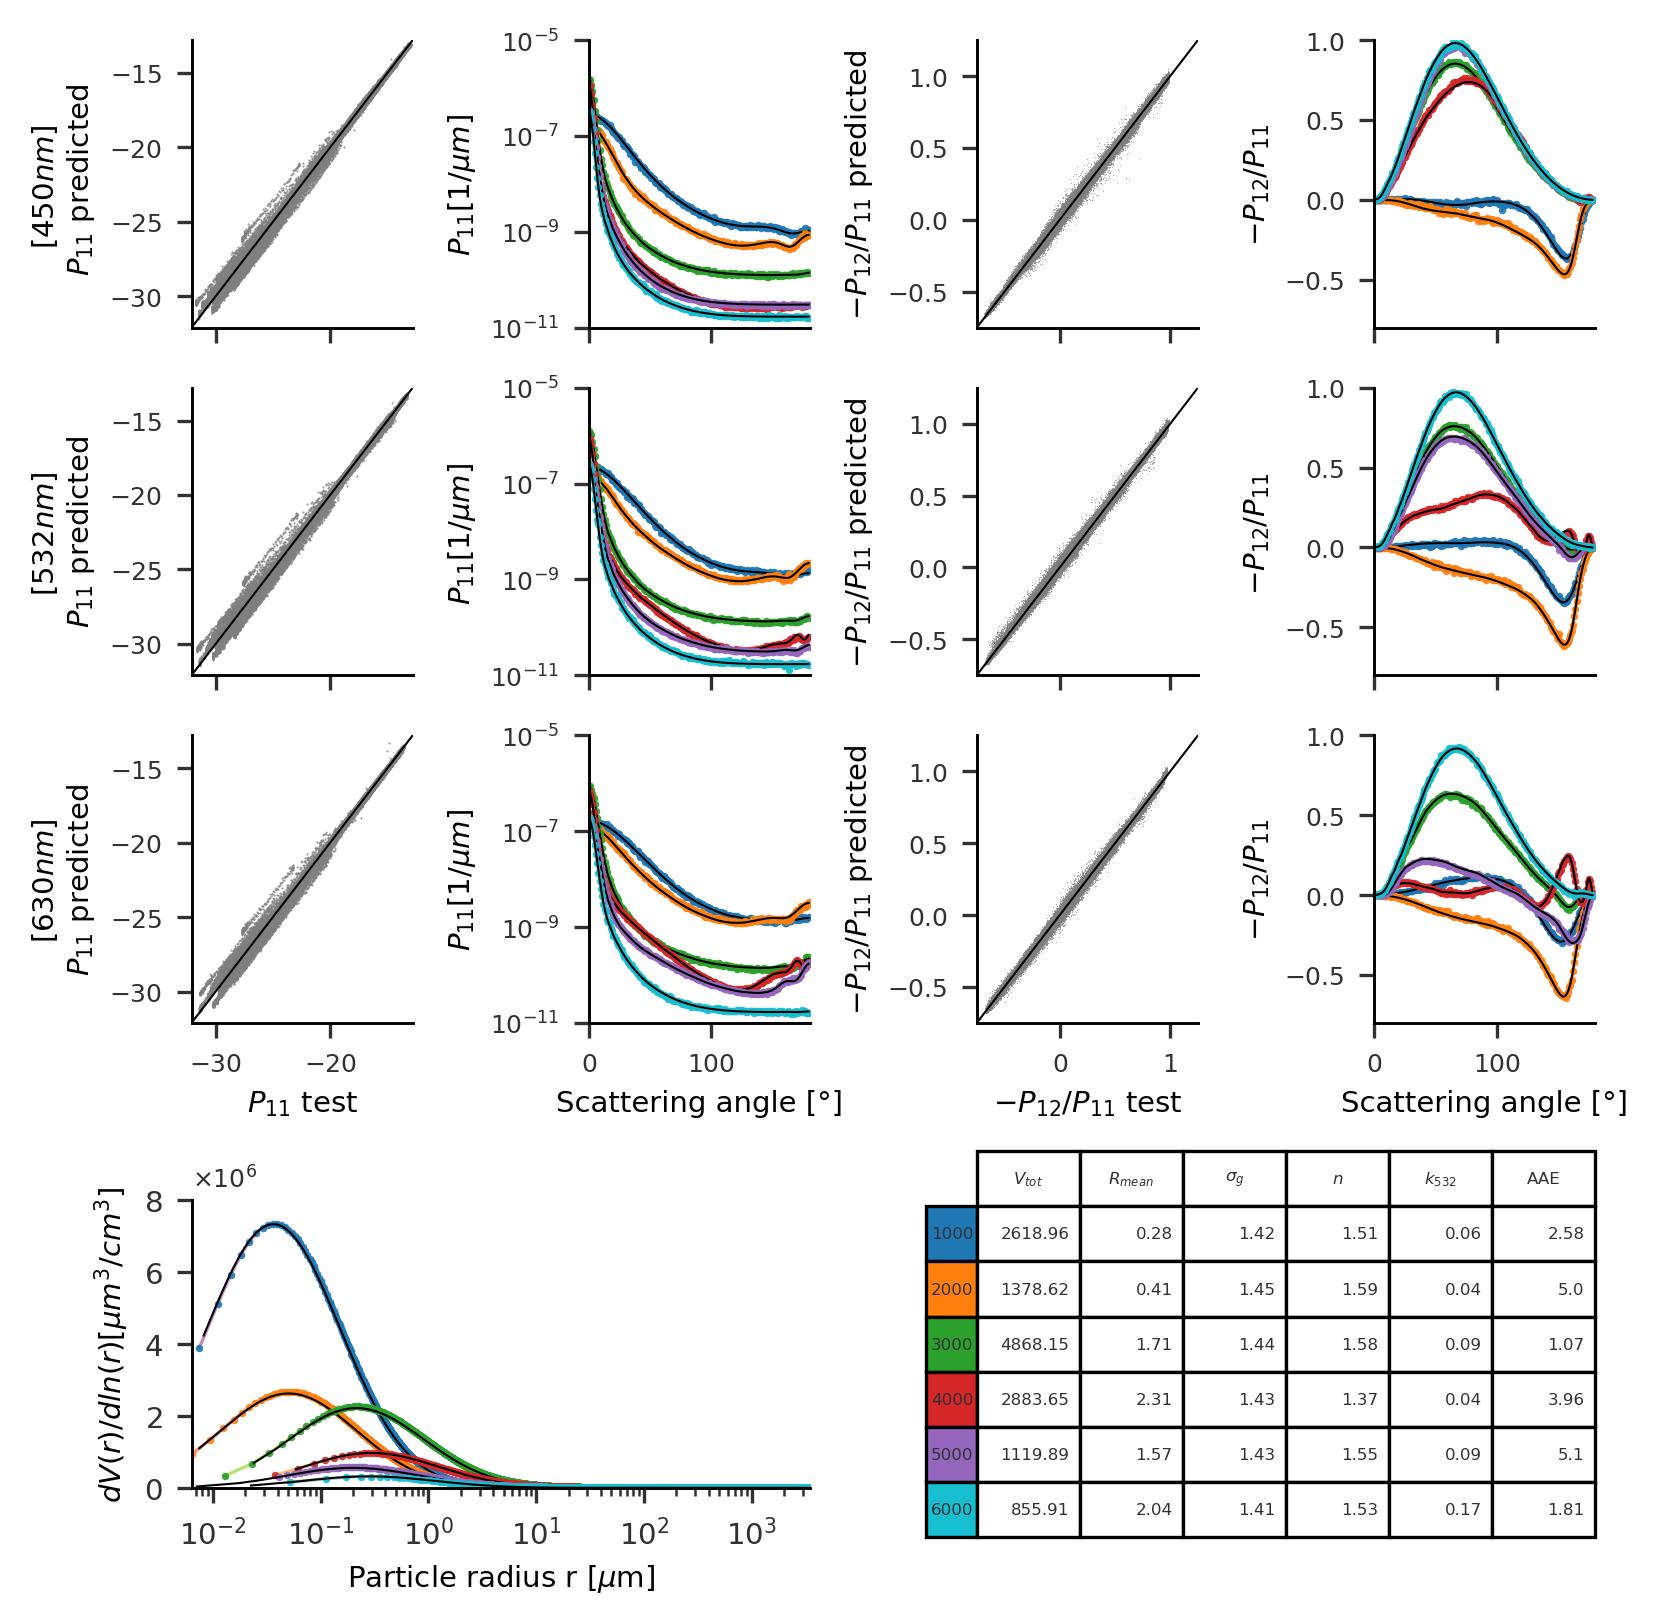

In [53]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 1],sharex=ax2)
ax7 = fig.add_subplot(gs[1, 2],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 3],sharex=ax4)
ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 1],sharex=ax2)
ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 3],sharex=ax4)
ax13 = fig.add_subplot(gs[3,0:2])
ax14 = fig.add_subplot(gs[3,2:4])
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-32.1,-12.8)
ax1.set_ylim(-32.1,-12.8)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-32.1,-12.8)
ax5.set_ylim(-32.1,-12.8)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-32.1,-12.8)
ax9.set_ylim(-32.1,-12.8)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.75,1.25)
ax3.set_ylim(-0.75,1.25)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.75,1.25)
ax7.set_ylim(-0.75,1.25)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.75,1.25)
ax11.set_ylim(-0.75,1.25)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$dV(r)/d ln(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_table = pd.DataFrame()
df_new_table['V_tot'] = df_new['V_tot']
df_new_table['R_median']=df_new['R_median']
df_new_table['GSD']=df_new['GSD']
df_new_table['n']=df_new['n']
df_new_table['k_532']=df_new['k_532']
df_new_table['AAE']=df_new['AAE']
df_new_table
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']
ax14.axis('tight')
ax14.axis('off')
ax14.table(cellText=df_new_table.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,fontsize=20)





#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V.jpg',bbox_inches='tight')








In [52]:
df_new_table

Empty DataFrame
Columns: []
Index: []

In [48]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_paper'

In [42]:
df_new

V_tot  R_median   GSD     n  k_532   AAE  k_450  k_630
4000  2618.96      0.28  1.42  1.51   0.06  2.58   0.08   0.05
1000  1378.62      0.41  1.45  1.59   0.04  5.00   0.09   0.02
6000  4868.15      1.71  1.44  1.58   0.09  1.07   0.09   0.09
3000  2883.65      2.31  1.43  1.37   0.04  3.96   0.06   0.02
2000  1119.89      1.57  1.43  1.55   0.09  5.10   0.19   0.05
5000   855.91      2.04  1.41  1.53   0.17  1.81   0.20   0.15

In [43]:
df_new_columns

['$V_{tot}$', '$R_{mean}$', '$\\sigma_g$', '$n$', '$k_{532}$', 'AAE']

In [ ]:
plot_dir

In [ ]:
np.min(x1data)

In [ ]:
datalen

IndexError: list index out of range

/data/user/boiger_r/python_env/aerosol_env_update/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


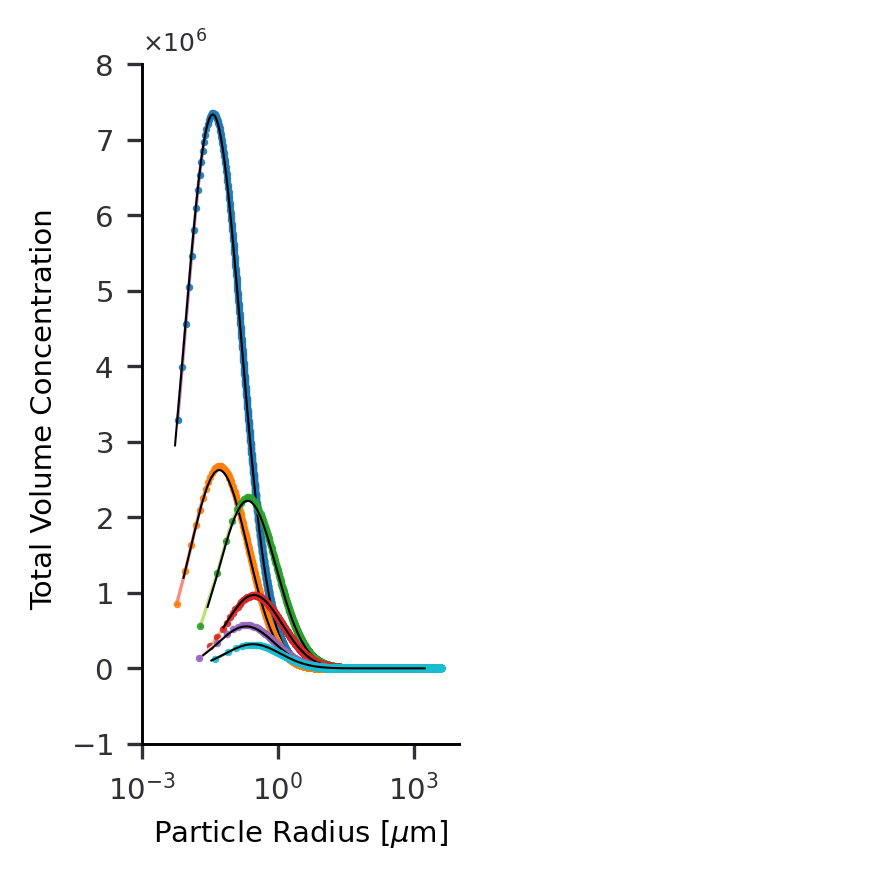

In [41]:
fig = plt.figure(figsize=(3,3))
ax= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax.set_xscale('log')
    ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 7)
    ax.set_ylabel('Total Volume Concentration ',fontsize = 7)
    ax.tick_params(labelsize = 7)    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    fig.align_labels()
    
ax2.axis('tight')
ax2.axis('off')
ax2.table(cellText=df_new.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1, fontsize = 20)



In [ ]:

df_new

In [ ]:
df_new.index



In [ ]:

fig, ax =plt.subplots(1,1)



ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_new.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,colWidths=[0.1,0.1,0.1,0.1,0.1,0.1])

#plt.show()


In [ ]:
np.min(qoi_test[wl_P12_532].min())

In [ ]:
plt.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_532],"o",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0)


In [ ]:
df_test_P11_532 = np.abs(qoi_test[wl_P11_532]-qoi_pred_fw[wl_P11_532])
absolute_array_P11_532 = np.abs(df_test_P11_532-np.mean(np.linalg.norm(df_test_P11_532.values,axis=1)))
df_test_P12_532 = np.abs(qoi_test[wl_P12_532]-qoi_pred_fw[wl_P12_532])
absolute_array_P12_532 = np.abs(df_test_P12_532-np.mean(np.linalg.norm(df_test_P12_532.values,axis=1)))


In [ ]:
df_test_P11_450 = np.abs(qoi_test[wl_P11_450]-qoi_pred_fw[wl_P11_450])
absolute_array_P11_450 = np.abs(df_test_P11_450-np.mean(np.linalg.norm(df_test_P11_450.values,axis=1)))

df_test_P12_450 = np.abs(qoi_test[wl_P12_450]-qoi_pred_fw[wl_P12_450])
absolute_array_P12_450 = np.abs(df_test_P12_450-np.mean(np.linalg.norm(df_test_P12_450.values,axis=1)))


In [ ]:
df_test_P11_630 = np.abs(qoi_test[wl_P11_630]-qoi_pred_fw[wl_P11_630])
absolute_array_P11_630 = np.abs(df_test_P11_630-np.mean(np.linalg.norm(df_test_P11_630.values,axis=1)))

df_test_P12_630 = np.abs(qoi_test[wl_P12_630]-qoi_pred_fw[wl_P12_630])
absolute_array_P12_630 = np.abs(df_test_P12_630-np.mean(np.linalg.norm(df_test_P12_630.values,axis=1)))


In [ ]:
max_P11_532 = np.argmax(np.linalg.norm(df_test_P11_532.values,axis=1))
min_P11_532 = np.argmin(np.linalg.norm(df_test_P11_532.values,axis=1))
mean_P11_532 = np.argmin(np.linalg.norm(absolute_array_P11_532.values,axis=1))
print(max_P11_532,min_P11_532, mean_P11_532)

In [ ]:
max_P11_450 = np.argmax(np.linalg.norm(df_test_P11_450.values,axis=1))
min_P11_450 = np.argmin(np.linalg.norm(df_test_P11_450.values,axis=1))
mean_P11_450 = np.argmin(np.linalg.norm(absolute_array_P11_450.values,axis=1))
print(max_P11_450,min_P11_450, mean_P11_450)

In [ ]:
max_P11_630 = np.argmax(np.linalg.norm(df_test_P11_630.values,axis=1))
min_P11_630 = np.argmin(np.linalg.norm(df_test_P11_630.values,axis=1))
mean_P11_630 = np.argmin(np.linalg.norm(absolute_array_P11_630.values,axis=1))
print(max_P11_630,min_P11_630, mean_P11_630)

In [ ]:
max_P12_532 = np.argmax(np.linalg.norm(df_test_P12_532.values,axis=1))
min_P12_532 = np.argmin(np.linalg.norm(df_test_P12_532.values,axis=1))
mean_P12_532 = np.argmin(np.linalg.norm(absolute_array_P12_532.values,axis=1))
print(max_P12_532,min_P12_532, mean_P12_532)

In [ ]:
max_P12_450 = np.argmax(np.linalg.norm(df_test_P12_450.values,axis=1))
min_P12_450 = np.argmin(np.linalg.norm(df_test_P12_450.values,axis=1))
mean_P12_450 = np.argmin(np.linalg.norm(absolute_array_P12_450.values,axis=1))
print(max_P12_450,min_P12_450, mean_P12_450)

In [ ]:
max_P12_630 = np.argmax(np.linalg.norm(df_test_P12_630.values,axis=1))
min_P12_630 = np.argmin(np.linalg.norm(df_test_P12_630.values,axis=1))
mean_P12_630 = np.argmin(np.linalg.norm(absolute_array_P12_630.values,axis=1))
print(max_P12_630,min_P12_630, mean_P12_630)

In [ ]:
fig = plt.figure(figsize=(5.3,5))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

i = 0
presentation_plot_index

ax1.plot(qoi_test[wl_P11_532].iloc[max_P11_532],qoi_pred_fw[wl_P11_532].iloc[max_P11_532])

ax2_twin = ax2.twinx()
ax2_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),np.abs(qoi_test[wl_P11_532].iloc[max_P11_532]-qoi_pred_fw[wl_P11_532].iloc[max_P11_532]),'b')

ax2.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),qoi_test[wl_P11_532].iloc[max_P11_532])
ax2.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),qoi_pred_fw[wl_P11_532].iloc[max_P11_532])


ax3_twin = ax3.twinx()
ax3_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_450])),np.abs(qoi_test[wl_P11_532].iloc[mean_P11_450]-qoi_pred_fw[wl_P11_532].iloc[mean_P11_450]),'b')

ax3.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_450])),qoi_test[wl_P11_532].iloc[mean_P11_450])
ax3.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_450])),qoi_pred_fw[wl_P11_532].iloc[mean_P11_450])

ax4_twin = ax4.twinx()
ax4_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_450])),np.abs(qoi_test[wl_P11_532].iloc[min_P11_450]-qoi_pred_fw[wl_P11_532].iloc[min_P11_450]),'b')

ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_450])),qoi_test[wl_P11_532].iloc[min_P11_450])
ax4.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_450])),qoi_pred_fw[wl_P11_532].iloc[min_P11_450])

fig.tight_layout() 

In [ ]:
fig = plt.figure(figsize=(5.3,5))
ax1 = fig.add_subplot(334)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(331)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

i = 0
presentation_plot_index

#ax1.plot(qoi_test[wl_P11_532].iloc[16732],qoi_pred_fw[wl_P11_532].iloc[16732])

ax1_twin = ax1.twinx()
ax1_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),np.abs(qoi_test[wl_P11_532].iloc[max_P11_532]-qoi_pred_fw[wl_P11_532].iloc[max_P11_532])/np.abs(qoi_test[wl_P11_532].iloc[max_P11_532]),'g')

ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),np.exp(qoi_test[wl_P11_532].iloc[max_P11_532]),'r')
ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[max_P11_532])),np.exp(qoi_pred_fw[wl_P11_532].iloc[max_P11_532]),'b')


#ax2_twin = ax3.twinx()
ax1_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_532])),np.abs(qoi_test[wl_P11_532].iloc[mean_P11_532]-qoi_pred_fw[wl_P11_532].iloc[mean_P11_532])/np.abs(qoi_test[wl_P11_532].iloc[mean_P11_532]),'g')

ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_532])),np.exp(qoi_test[wl_P11_532].iloc[mean_P11_532]),'r')
ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[mean_P11_532])),np.exp(qoi_pred_fw[wl_P11_532].iloc[mean_P11_532]),'b')

#ax4_twin = ax4.twinx()
ax1_twin.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_532])),np.abs(qoi_test[wl_P11_532].iloc[min_P11_532]-qoi_pred_fw[wl_P11_532].iloc[min_P11_532])/np.abs(qoi_test[wl_P11_532].iloc[min_P11_532]),'g')

ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_532])),np.exp(qoi_test[wl_P11_532].iloc[min_P11_532]),'r')
ax1.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[min_P11_532])),np.exp(qoi_pred_fw[wl_P11_532].iloc[min_P11_532]),'b')

ax1.set_yscale('log')

ax4_twin = ax4.twinx()
ax4_twin.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[max_P11_450])),np.abs(qoi_test[wl_P11_450].iloc[max_P11_450]-qoi_pred_fw[wl_P11_450].iloc[max_P11_450]),'g')

ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[max_P11_450])),np.exp(qoi_test[wl_P11_450].iloc[max_P11_450]),'r')
ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[max_P11_450])),np.exp(qoi_pred_fw[wl_P11_450].iloc[max_P11_450]),'b')

ax4_twin.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[mean_P11_450])),np.abs(qoi_test[wl_P11_450].iloc[mean_P11_450]-qoi_pred_fw[wl_P11_450].iloc[mean_P11_450]),'g')
ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[mean_P11_450])),np.exp(qoi_test[wl_P11_450].iloc[mean_P11_450]),'r')
ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[mean_P11_450])),np.exp(qoi_pred_fw[wl_P11_450].iloc[mean_P11_450]),'b')

ax4_twin.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[min_P11_450])),np.abs(qoi_test[wl_P11_450].iloc[min_P11_450]-qoi_pred_fw[wl_P11_450].iloc[min_P11_450]),'g')
ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[min_P11_450])),np.exp(qoi_test[wl_P11_450].iloc[min_P11_450]),'r')
ax4.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[min_P11_450])),np.exp(qoi_pred_fw[wl_P11_450].iloc[min_P11_450]),'b')

ax4.set_yscale('log')


ax7_twin = ax7.twinx()
ax7_twin.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[max_P11_630])),np.abs(qoi_test[wl_P11_630].iloc[max_P11_630]-qoi_pred_fw[wl_P11_630].iloc[max_P11_630]),'g')

ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[max_P11_630])),np.exp(qoi_test[wl_P11_630].iloc[max_P11_630]),'r')
ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[max_P11_630])),np.exp(qoi_pred_fw[wl_P11_630].iloc[max_P11_630]),'b')

ax7_twin.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[mean_P11_630])),np.abs(qoi_test[wl_P11_630].iloc[mean_P11_630]-qoi_pred_fw[wl_P11_630].iloc[mean_P11_630]),'g')
ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[mean_P11_630])),np.exp(qoi_test[wl_P11_630].iloc[mean_P11_630]),'r')
ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[mean_P11_630])),np.exp(qoi_pred_fw[wl_P11_630].iloc[mean_P11_630]),'b')

ax7_twin.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[min_P11_630])),np.abs(qoi_test[wl_P11_630].iloc[min_P11_630]-qoi_pred_fw[wl_P11_630].iloc[min_P11_630]),'g')
ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[min_P11_630])),np.exp(qoi_test[wl_P11_630].iloc[min_P11_630]),'r')
ax7.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[min_P11_630])),np.exp(qoi_pred_fw[wl_P11_630].iloc[min_P11_630]),'b')

ax7.set_yscale('log')

ax2_twin = ax2.twinx()
ax2_twin.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[max_P12_532])),np.abs(qoi_test[wl_P12_532].iloc[max_P12_532]-qoi_pred_fw[wl_P12_532].iloc[max_P12_532])/np.abs(qoi_test[wl_P12_532].iloc[max_P12_532]),'g')
ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[max_P12_532])),np.exp(qoi_test[wl_P12_532].iloc[max_P12_532]),'r')
ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[max_P12_532])),np.exp(qoi_pred_fw[wl_P12_532].iloc[max_P12_532]),'b')


#ax2_twin = ax3.twinx()
ax2_twin.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[mean_P12_532])),np.abs(qoi_test[wl_P12_532].iloc[mean_P12_532]-qoi_pred_fw[wl_P12_532].iloc[mean_P12_532])/np.abs(qoi_test[wl_P12_532].iloc[mean_P12_532]),'g')

ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[mean_P12_532])),np.exp(qoi_test[wl_P12_532].iloc[mean_P12_532]),'r')
ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[mean_P12_532])),np.exp(qoi_pred_fw[wl_P12_532].iloc[mean_P12_532]),'b')

#ax4_twin = ax4.twinx()
ax2_twin.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[min_P12_532])),np.abs(qoi_test[wl_P12_532].iloc[min_P12_532]-qoi_pred_fw[wl_P12_532].iloc[min_P12_532])/np.abs(qoi_test[wl_P12_532].iloc[min_P12_532]),'g')

ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[min_P12_532])),np.exp(qoi_test[wl_P12_532].iloc[min_P12_532]),'r')
ax2.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[min_P12_532])),np.exp(qoi_pred_fw[wl_P12_532].iloc[min_P12_532]),'b')



ax5_twin = ax5.twinx()
ax5_twin.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[max_P12_450])),np.abs(qoi_test[wl_P12_450].iloc[max_P12_450]-qoi_pred_fw[wl_P12_450].iloc[max_P12_450]),'g')

ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[max_P12_450])),np.exp(qoi_test[wl_P12_450].iloc[max_P12_450]),'r')
ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[max_P12_450])),np.exp(qoi_pred_fw[wl_P12_450].iloc[max_P12_450]),'b')

ax5_twin.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[mean_P12_450])),np.abs(qoi_test[wl_P12_450].iloc[mean_P12_450]-qoi_pred_fw[wl_P12_450].iloc[mean_P12_450]),'g')
ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[mean_P12_450])),np.exp(qoi_test[wl_P12_450].iloc[mean_P12_450]),'r')
ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[mean_P12_450])),np.exp(qoi_pred_fw[wl_P12_450].iloc[mean_P12_450]),'b')

ax5_twin.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[min_P12_450])),np.abs(qoi_test[wl_P12_450].iloc[min_P12_450]-qoi_pred_fw[wl_P12_450].iloc[min_P12_450]),'g')
ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[min_P12_450])),np.exp(qoi_test[wl_P12_450].iloc[min_P12_450]),'r')
ax5.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[min_P12_450])),np.exp(qoi_pred_fw[wl_P12_450].iloc[min_P12_450]),'b')




ax8_twin = ax8.twinx()
ax8_twin.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[max_P12_630])),np.abs(qoi_test[wl_P12_630].iloc[max_P12_630]-qoi_pred_fw[wl_P12_630].iloc[max_P12_630]),'g')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[max_P12_630])),np.exp(qoi_test[wl_P12_630].iloc[max_P12_630]),'r')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[max_P12_630])),np.exp(qoi_pred_fw[wl_P12_630].iloc[max_P12_630]),'b')

ax8_twin.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[mean_P12_630])),np.abs(qoi_test[wl_P12_630].iloc[mean_P12_630]-qoi_pred_fw[wl_P12_630].iloc[mean_P12_630]),'g')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[mean_P12_630])),np.exp(qoi_test[wl_P12_630].iloc[mean_P12_630]),'r')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[mean_P12_630])),np.exp(qoi_pred_fw[wl_P12_630].iloc[mean_P12_630]),'b')

ax8_twin.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[min_P12_630])),np.abs(qoi_test[wl_P12_630].iloc[min_P12_630]-qoi_pred_fw[wl_P12_630].iloc[min_P12_630]),'g')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[min_P12_630])),np.exp(qoi_test[wl_P12_630].iloc[min_P12_630]),'r')
ax8.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[min_P12_630])),np.exp(qoi_pred_fw[wl_P12_630].iloc[min_P12_630]),'b')



fig.tight_layout() 

In [ ]:
absolute_array = np.abs(df_test-np.median(np.linalg.norm(df_test.values,axis=1)))
np.argmin(np.linalg.norm(absolute_array.values,axis=1))

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],"b.",markeredgecolor=None)
ax.axline([-20, -20], [-10, -10])
ax.set_xlim(-32,-13)
ax.set_ylim(-32,-13)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_532.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],".")
ax.axline([-20, -20], [-10, -10])
ax.set_xlim(-32,-12.8)
ax.set_ylim(-32,-12.8)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_450.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],".")
ax.axline([-20, -20], [-10, -10])
ax.set_xlim(-32,-13)
ax.set_ylim(-32,-13)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_630.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],"b.",markeredgecolor=None)
ax.axline([-1, -1], [1, 1])
#ax.set_xlim(-32,-13)
#ax.set_ylim(-32,-13)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_532.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".")
ax.axline([-1, -1], [1, 1])
#ax.set_xlim(-32,-12.8)
#ax.set_ylim(-32,-12.8)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_450.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".")
ax.axline([-1, -1], [1, 1])
#ax.set_xlim(-32,-13)
#ax.set_ylim(-32,-13)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_P11_630.jpg')

In [ ]:
np.max(qoi_pred_fw[wl_P11_630].max())

In [ ]:
dvar_test.describe()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['V_tot'],dvar_pred_iv['V_tot'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(1,5000)
ax.set_ylim(1,5000)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_V_tot.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['R_median'],dvar_pred_iv['R_median'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(0,2.6)
ax.set_ylim(0,2.6)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_R_median.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['GSD'],dvar_pred_iv['GSD'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(1.39,1.46)
ax.set_ylim(1.39,1.46)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_GSD.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['n'],dvar_pred_iv['n'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(1.3,1.61)
ax.set_ylim(1.3,1.61)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_n.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['k_532'],dvar_pred_iv['k_532'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(0,0.2)
ax.set_ylim(0,0.2)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_k_532.jpg')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.3,5))
plt.plot(dvar_test['AAE'],dvar_pred_iv['AAE'],".")
ax.axline([0, 0], [1, 1])
ax.set_xlim(1,7)
ax.set_ylim(1,7)

#ax.axis('equal')
fig.savefig(f'{plot_dir}/Test_Pred_AAE.jpg')

In [ ]:
df_new = dvar_test.iloc[presentation_plot_index]

In [ ]:
plot_dir

In [ ]:
df_new['plot_index'] = presentation_plot_index

In [ ]:
df_new

In [ ]:
df_newr = df_new.copy()
df_newr

In [ ]:
df_newr.iloc[0].values

In [ ]:
def colorfun_new(value):
    if value in  df_newr.iloc[0].values:
        color = color1[0]
    elif value in  df_newr.iloc[1].values:
        color = color1[1]
    elif value in  df_newr.iloc[2].values:
        color = color1[2]
    elif value in  df_newr.iloc[3].values:
        color = color1[3]
    elif value in  df_newr.iloc[4].values:
        color = color1[4]
    elif value in  df_newr.iloc[5].values:
        color = color1[5]
    else:
        color = 'black'
    print('background-color: %s' % color)  
    return 'color: %s' % color,   

In [ ]:
def color_negative_red(value):
    if value in  df_newr.iloc[0].values:
        color = color1[0]
    elif value in  df_newr.iloc[1].values:
        color = color1[1]
    elif value in  df_newr.iloc[2].values:
        color = color1[2]
    elif value in  df_newr.iloc[3].values:
        color = color1[3]
    elif value in  df_newr.iloc[4].values:
        color = color1[4]
    elif value in  df_newr.iloc[5].values:
        color = color1[5]
    else:
        color = 'black'
    return 'background-color: %s' % color

In [ ]:
df_new1 = df_newr[['V_tot','R_median','GSD']]
df_new2 = df_newr[['n','k_532','AAE']]

In [ ]:
df_new1.style.applymap(color_negative_red)

In [ ]:
df_new2.style.applymap(color_negative_red)

In [ ]:
df_new1

In [ ]:
df_new1.style.applymap(colorfun_new)

In [ ]:
df_new2.style.applymap(colorfun_new)